In [43]:
Student_Name1 = "AmirKasra Ahmadi"
Student_Number1 = "401170507"

Student_Name2 = "Shamim Rahimi"
Student_Number2 = "401105956"

Student_Name3 = "Ashkan Tariverdi"
Student_Number3 = "401105753"

#import libraries

In [1]:
!pip install -q transformers[torch]
!pip install -q python-bidi
!pip install -q hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 28.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from string import punctuation
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


# Exploratory Data Analysis (EDA) on Movie Dataset

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

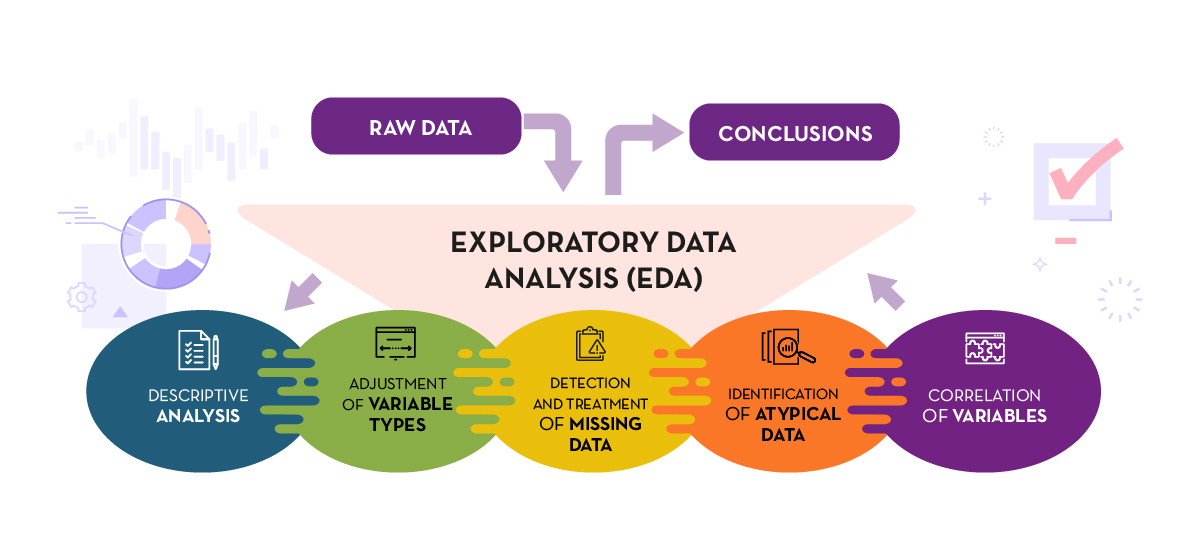

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [4]:
df = pd.read_csv("persianmovies.csv", index_col=0)
df = df.drop(df[df['Year'] == 0].index)
df['Time'] = df['Time'].astype(float)
df.dropna(inplace=True)
df.head(10)

,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time
Link,,,,,,,,,
https://www.imvbox.com/watch-persian-movie-iranian-movies/local-anaesthetic-bi-hessie-mozeie,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/disturbance-ashoftegi,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/highlight-haylayt,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/gilda-gilda,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/atmosphere-station-istgha-e-atmosfer,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/gold-carrier-hammal-tala,Gold Carrier,Hammale Tala,حمال طلا,رضا حمال طلاست و شغلش رساندن طلا و جواهرات از ...,A gold carrier gets robbed on his way to work ...,5.2,2018,Human Interest & Society,84.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/women-are-angels2-zanha-fereshte-and2,Women Are Angels 2,Zanha Fereshte And 2,زن ها فرشته اند 2,چند زوج در رده‌های سنی مختلف در سال ۲۰۲۰ به‌دن...,Several couples in different age groups in 202...,3.1,2020,Comedy,80.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/filicide,Filicide,Pesarkoshi,پسرکشی,داستان این فیلم در ۲ دهه ۴۰ و ۷۰ می گذرد و داس...,It tells the story of a social and enigmatic s...,4.8,2020,Drama,88.0
https://www.imvbox.com/watch-persian-movie-iranian-movies/in-silence-dar-sokout,In silence,Dar Sokout,در سکوت,سودابه پس از سالها به ایران بازمی‌گردد تا از ع...,Sudabeh is a 47 years old woman who specialize...,5.2,2016,Drama,84.0


In [5]:
class English_Preprocessor:
    """
    A class for preprocessing text data.

    Attributes:
        stopwords (set): A set of stopwords to be removed from the text.
        nlp (spacy.lang.en.English): A SpaCy English language model for text normalization.

    Methods:
        preprocess(text): Performs preprocessing steps on the given text.
        normalize(text): Normalizes the given text by converting it to lowercase and lemmatizing the words.
        remove_punctuations(text): Removes punctuation from the given text.
        word_tokenize(text): Tokenizes the given text into individual words.
        remove_stopwords(words): Removes stopwords from the given list of words.
        **ADD MORE METHODS**
    """

    def __init__(self):
        """
        Initializes the Preprocessor object.

        TODO: Load the set of stopwords for the English language.
        TODO: Load the SpaCy English language model for text normalization.
        """
        self.stop_words = nltk.corpus.stopwords.words('english')
        self.nlp = spacy.load("en_core_web_sm")
        pass

    def preprocess(self, text):
        """
        Preprocesses the given text by performing normalization, punctuation removal, word tokenization, and stopword removal.

        Args:
            text (str): The input text to be preprocessed.

        Returns:
            str: The preprocessed text.

        TODO: Implement the preprocess method by calling the respective helper methods in the correct order.
        """
        normalized_text = self.normalize(str(text))
        punc_removed_text = self.remove_punctuations(normalized_text)
        tokenized_words = self.word_tokenize(punc_removed_text)
        preprocessed_words = self.remove_stopwords(tokenized_words)
        preprocessed_text = " ".join(str(word) for word in preprocessed_words)
        return preprocessed_text

    def normalize(self, text):
        """
        Normalizes the given text by converting it to lowercase and lemmatizing the words.

        Args:
            text (str): The input text to be normalized.

        Returns:
            str: The normalized text.

        TODO: Implement the normalize method using the SpaCy language model to lemmatize the words.
        """
        doc = self.nlp(text)
        lemmatized_tokens = [token.lemma_ for token in doc]
        lemmatized_text = ' '.join(lemmatized_tokens)
        return lemmatized_text

    def remove_punctuations(self, text):
        """
        Removes punctuation from the given text.

        Args:
            text (str): The input text from which punctuation needs to be removed.

        Returns:
            str: The text with punctuation removed.

        TODO: Implement the remove_punctuations method using regular expressions.
        """
        punc_removed_text = re.sub(r'[^\w\s]', '', text)
        return punc_removed_text

    def word_tokenize(self, text):
        """
        Tokenizes the given text into individual words.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            list: A list of tokens (words) in the text.

        TODO: Implement the word_tokenize method using the NLTK word_tokenize function.
        """
        return word_tokenize(text)

    def remove_stopwords(self, words):
        """
        Removes stopwords from the given list of words.

        Args:
            words (list): A list of words from which stopwords need to be removed.

        Returns:
            list: A list of words with stopwords removed.

        TODO: Implement the remove_stopwords method by filtering out words present in the stopwords set.
        """
        cleaned_words = [word for word in words if not word in self.stop_words]
        return cleaned_words

In [6]:
en_preprocessor = English_Preprocessor()
df.insert(9, 'Preprocessed_English', " ", True)
df['Preprocessed_English'] = df['Content_2'].apply(en_preprocessor.preprocess)
df.head(10)

,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed_English
Link,,,,,,,,,,
https://www.imvbox.com/watch-persian-movie-iranian-movies/local-anaesthetic-bi-hessie-mozeie,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73.0,Jalal dropout philosophy student realize siste...
https://www.imvbox.com/watch-persian-movie-iranian-movies/disturbance-ashoftegi,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78.0,murder rich twin brother Barbod assume identit...
https://www.imvbox.com/watch-persian-movie-iranian-movies/highlight-haylayt,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77.0,man woman car accident go coma spouse know two...
https://www.imvbox.com/watch-persian-movie-iranian-movies/gilda-gilda,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79.0,Gilda restaurant terrible night till morning s...
https://www.imvbox.com/watch-persian-movie-iranian-movies/atmosphere-station-istgha-e-atmosfer,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85.0,Vahid Marjan young couple get divorce month ag...
https://www.imvbox.com/watch-persian-movie-iranian-movies/gold-carrier-hammal-tala,Gold Carrier,Hammale Tala,حمال طلا,رضا حمال طلاست و شغلش رساندن طلا و جواهرات از ...,A gold carrier gets robbed on his way to work ...,5.2,2018,Human Interest & Society,84.0,gold carrier get rob way work ask friend help ...
https://www.imvbox.com/watch-persian-movie-iranian-movies/women-are-angels2-zanha-fereshte-and2,Women Are Angels 2,Zanha Fereshte And 2,زن ها فرشته اند 2,چند زوج در رده‌های سنی مختلف در سال ۲۰۲۰ به‌دن...,Several couples in different age groups in 202...,3.1,2020,Comedy,80.0,several couple different age group 2020 look d...
https://www.imvbox.com/watch-persian-movie-iranian-movies/filicide,Filicide,Pesarkoshi,پسرکشی,داستان این فیلم در ۲ دهه ۴۰ و ۷۰ می گذرد و داس...,It tells the story of a social and enigmatic s...,4.8,2020,Drama,88.0,tell story social enigmatic story chronicle ha...
https://www.imvbox.com/watch-persian-movie-iranian-movies/in-silence-dar-sokout,In silence,Dar Sokout,در سکوت,سودابه پس از سالها به ایران بازمی‌گردد تا از ع...,Sudabeh is a 47 years old woman who specialize...,5.2,2016,Drama,84.0,Sudabeh 47 year old woman specialize recycling...


In [7]:
from hazm import Normalizer, word_tokenize, stopwords_list

normalizer = Normalizer()
stopwords = set(stopwords_list())

def persian_preprocess_text(text):
    """
    Preprocesses the given Persian text by performing normalization, punctuation removal, word tokenization, and stopword removal.

    Args:
        text (str): The input Persian text to be preprocessed.

    Returns:
        str: The preprocessed Persian text.

    TODO: Implement the following steps:
    1. Remove punctuations from the text using regular expressions.
    2. Normalize the text using the HAZM Normalizer.
    3. Tokenize the normalized text using the HAZM word_tokenize function.
    4. Remove stopwords from the tokenized text using the loaded stopwords list.
    5. Join the remaining tokens back into a string.
    6. ... (what other preprocessing methods you want to have)
    """
    punc_removed_text = re.sub(f'[{punctuation}؟،٪×÷»«]+', '', str(text))
    normalized_text = normalizer.normalize(punc_removed_text)
    tokenized_words = word_tokenize(normalized_text)
    cleaned_words = [word for word in tokenized_words if word not in stopwords]

    preprocessed_text = " ".join(str(word) for word in cleaned_words)
    return preprocessed_text


df.insert(10, 'Preprocessed_Persian', " ", True)
df['Preprocessed_Persian'] = df['Content_1'].apply(lambda x: persian_preprocess_text(x) if isinstance(x, str) else '')
df.head(10)

,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed_English,Preprocessed_Persian
Link,,,,,,,,,,,
https://www.imvbox.com/watch-persian-movie-iranian-movies/local-anaesthetic-bi-hessie-mozeie,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73.0,Jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...
https://www.imvbox.com/watch-persian-movie-iranian-movies/disturbance-ashoftegi,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78.0,murder rich twin brother Barbod assume identit...,آشفته‌گی رئالیستی اجتماعی فیلم عشق جنایت
https://www.imvbox.com/watch-persian-movie-iranian-movies/highlight-haylayt,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدم‌هایی تقابل قرار مراقبت مصدوم...
https://www.imvbox.com/watch-persian-movie-iranian-movies/gilda-gilda,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79.0,Gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...
https://www.imvbox.com/watch-persian-movie-iranian-movies/atmosphere-station-istgha-e-atmosfer,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85.0,Vahid Marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...
https://www.imvbox.com/watch-persian-movie-iranian-movies/gold-carrier-hammal-tala,Gold Carrier,Hammale Tala,حمال طلا,رضا حمال طلاست و شغلش رساندن طلا و جواهرات از ...,A gold carrier gets robbed on his way to work ...,5.2,2018,Human Interest & Society,84.0,gold carrier get rob way work ask friend help ...,رضا حمال طلاست شغلش رساندن طلا جواهرات کارگاه ...
https://www.imvbox.com/watch-persian-movie-iranian-movies/women-are-angels2-zanha-fereshte-and2,Women Are Angels 2,Zanha Fereshte And 2,زن ها فرشته اند 2,چند زوج در رده‌های سنی مختلف در سال ۲۰۲۰ به‌دن...,Several couples in different age groups in 202...,3.1,2020,Comedy,80.0,several couple different age group 2020 look d...,زوج رده‌های سنی مختلف سال ۲۰۲۰ به‌دنبال تعریفی...
https://www.imvbox.com/watch-persian-movie-iranian-movies/filicide,Filicide,Pesarkoshi,پسرکشی,داستان این فیلم در ۲ دهه ۴۰ و ۷۰ می گذرد و داس...,It tells the story of a social and enigmatic s...,4.8,2020,Drama,88.0,tell story social enigmatic story chronicle ha...,داستان فیلم ۲ ۴۰ ۷۰ می‌گذرد داستانی معمایی پیچ...
https://www.imvbox.com/watch-persian-movie-iranian-movies/in-silence-dar-sokout,In silence,Dar Sokout,در سکوت,سودابه پس از سالها به ایران بازمی‌گردد تا از ع...,Sudabeh is a 47 years old woman who specialize...,5.2,2016,Drama,84.0,Sudabeh 47 year old woman specialize recycling...,سودابه سالها ایران بازمی‌گردد عذاب وجدان رهایی...


### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [8]:
# Feel free to add any desired methods to the class below this is a suggestion.

class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        """
        Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the summary statistics for each numerical column)

        TODO:
        1. Ensure that the specified columns are treated as numerical data types.
        2. Calculate and print the mean, median, mode, standard deviation, and range for each numerical column.
        """
        for col in numerical_cols:
          print(f"Column: {col}")
          mean = self.df[col].mean()
          median = self.df[col].median()
          mode = self.df[col].mode()
          std = self.df[col].std()
          min = self.df[col].min()
          max = self.df[col].max()
          print(f"Mean: {mean}")
          print(f"Median: {median}")
          print(f"Mode: {mode[0]}")
          print(f"Standard Deviation: {std}")
          print(f"Range: ({min}, {max})")
          print("-----------------------------------")
        pass

    def count_unique_values(self, categorical_cols):
        """
        Determine the count and frequency of unique values for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (prints the count and frequency of unique values for each categorical column)

        TODO:
        1. Iterate through each categorical column.
        2. Calculate the count and frequency of unique values for each column.
        3. Print the unique values, their counts, and their frequencies.
        """
        for col in categorical_cols:
          print(f"Column: {col}")
          value_counts = self.df[col].value_counts()
          total_count = self.df[col].count()
          for value, count in value_counts.items():
              frequency = count / total_count
              print(f"Value: {value}, Count: {count}, Frequency: {frequency:.4f}")
          print("\n")
        pass

# Example usage
numerical_cols = ['Score', 'Year', 'Time']
categorical_cols = ['Genre']

# Assuming you have a pandas DataFrame named 'df'
stats = DescriptiveStats(df)

stats.calculate_summary_stats(numerical_cols)
stats.count_unique_values(categorical_cols)

Column: Score
Mean: 6.373139158576051
Median: 6.6
Mode: 8.0
Standard Deviation: 1.5546214685316788
Range: (0.0, 10.0)
-----------------------------------
Column: Year
Mean: 2006.5685005393743
Median: 2008.0
Mode: 2017
Standard Deviation: 9.95439928010764
Range: (1969, 2020)
-----------------------------------
Column: Time
Mean: 90.96440129449839
Median: 90.0
Mode: 90.0
Standard Deviation: 12.167292542776728
Range: (38.0, 178.0)
-----------------------------------
Column: Genre
Value: Drama, Count: 537, Frequency: 0.5793
Value: Comedy, Count: 177, Frequency: 0.1909
Value: Action, Count: 56, Frequency: 0.0604
Value: Crime, Count: 46, Frequency: 0.0496
Value: Adventure, Count: 37, Frequency: 0.0399
Value: Family, Count: 17, Frequency: 0.0183
Value: War, Count: 16, Frequency: 0.0173
Value: Human Interest & Society, Count: 8, Frequency: 0.0086
Value: History, Count: 7, Frequency: 0.0076
Value: Horror, Count: 7, Frequency: 0.0076
Value: Romance, Count: 6, Frequency: 0.0065
Value: Mystery, Co

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

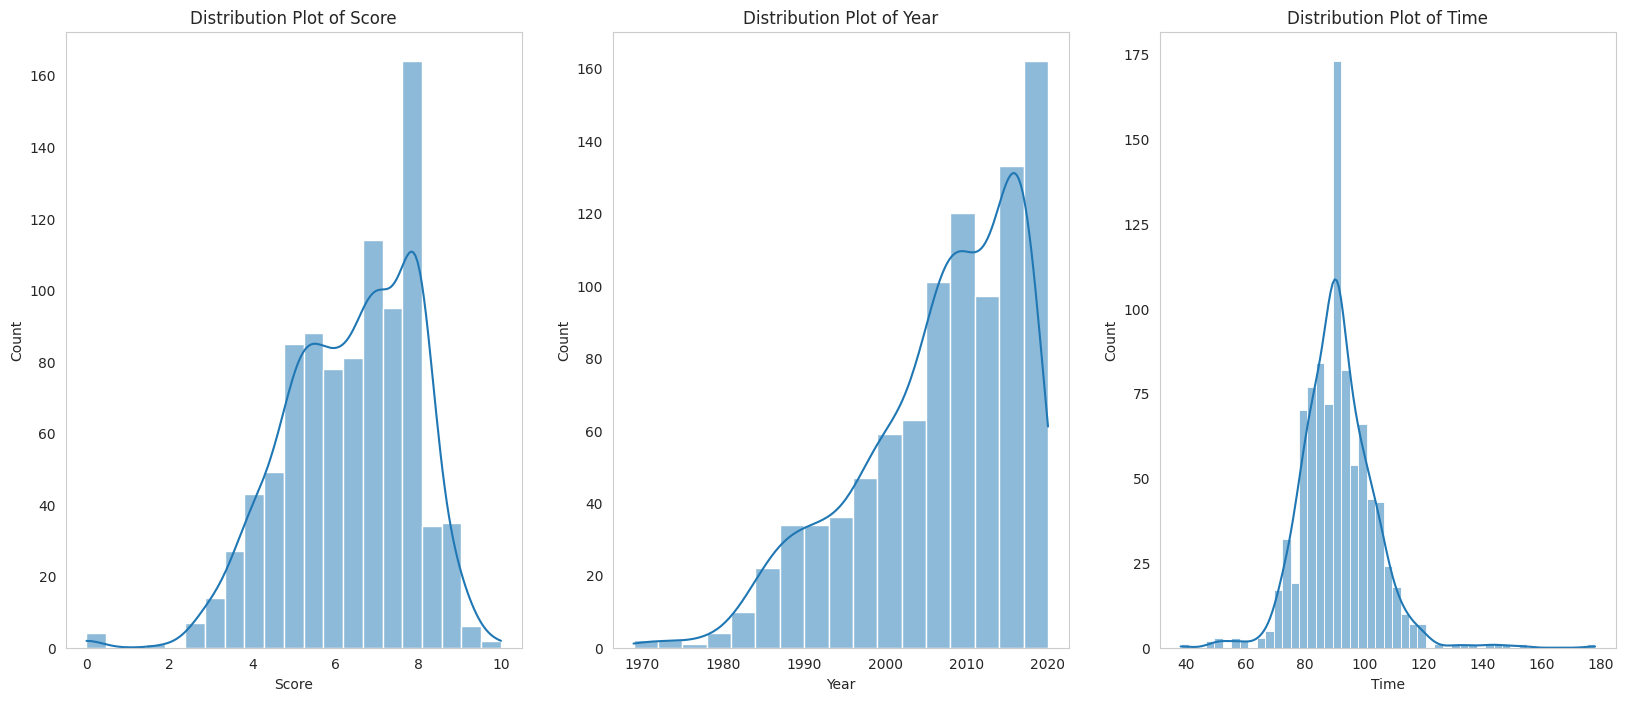

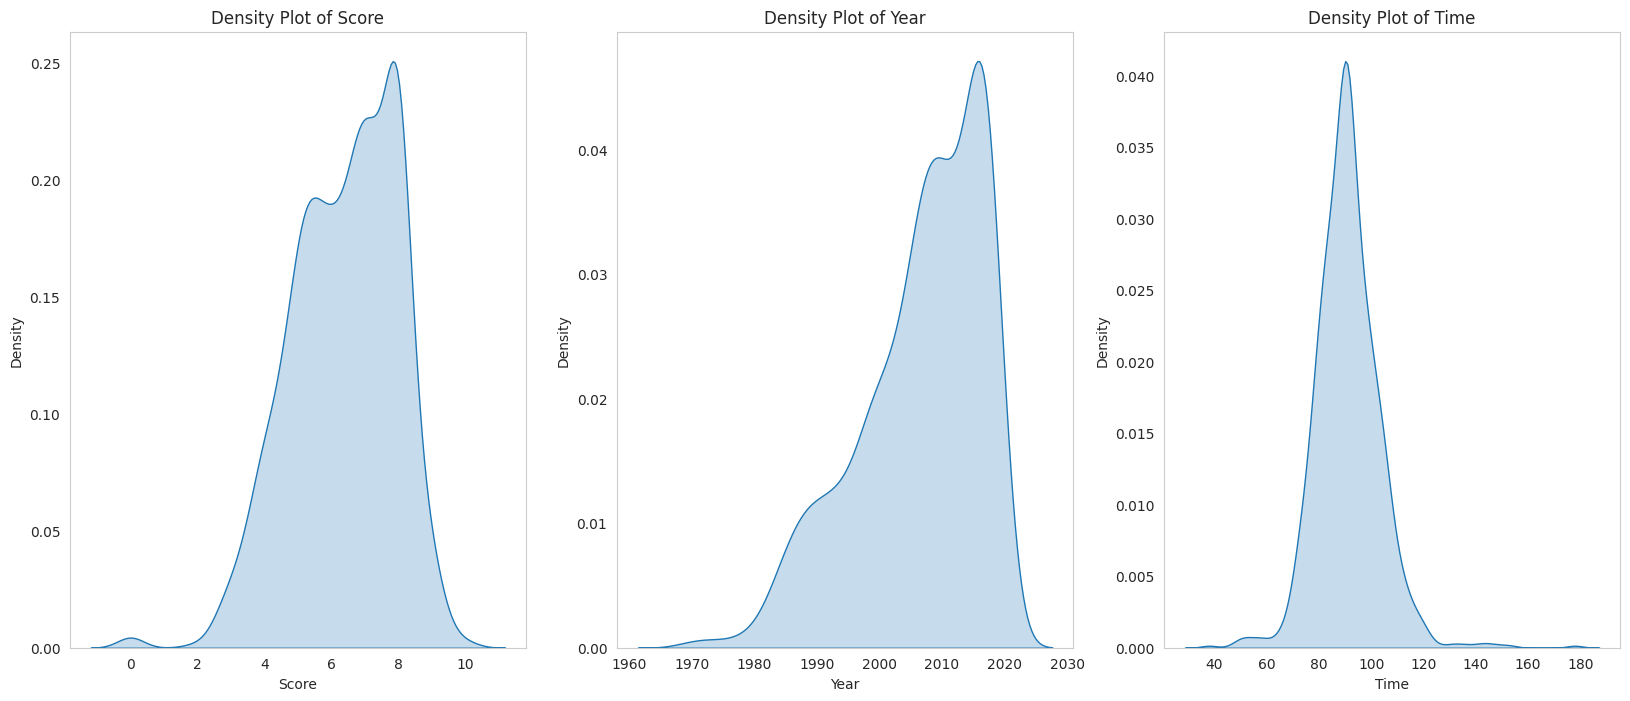

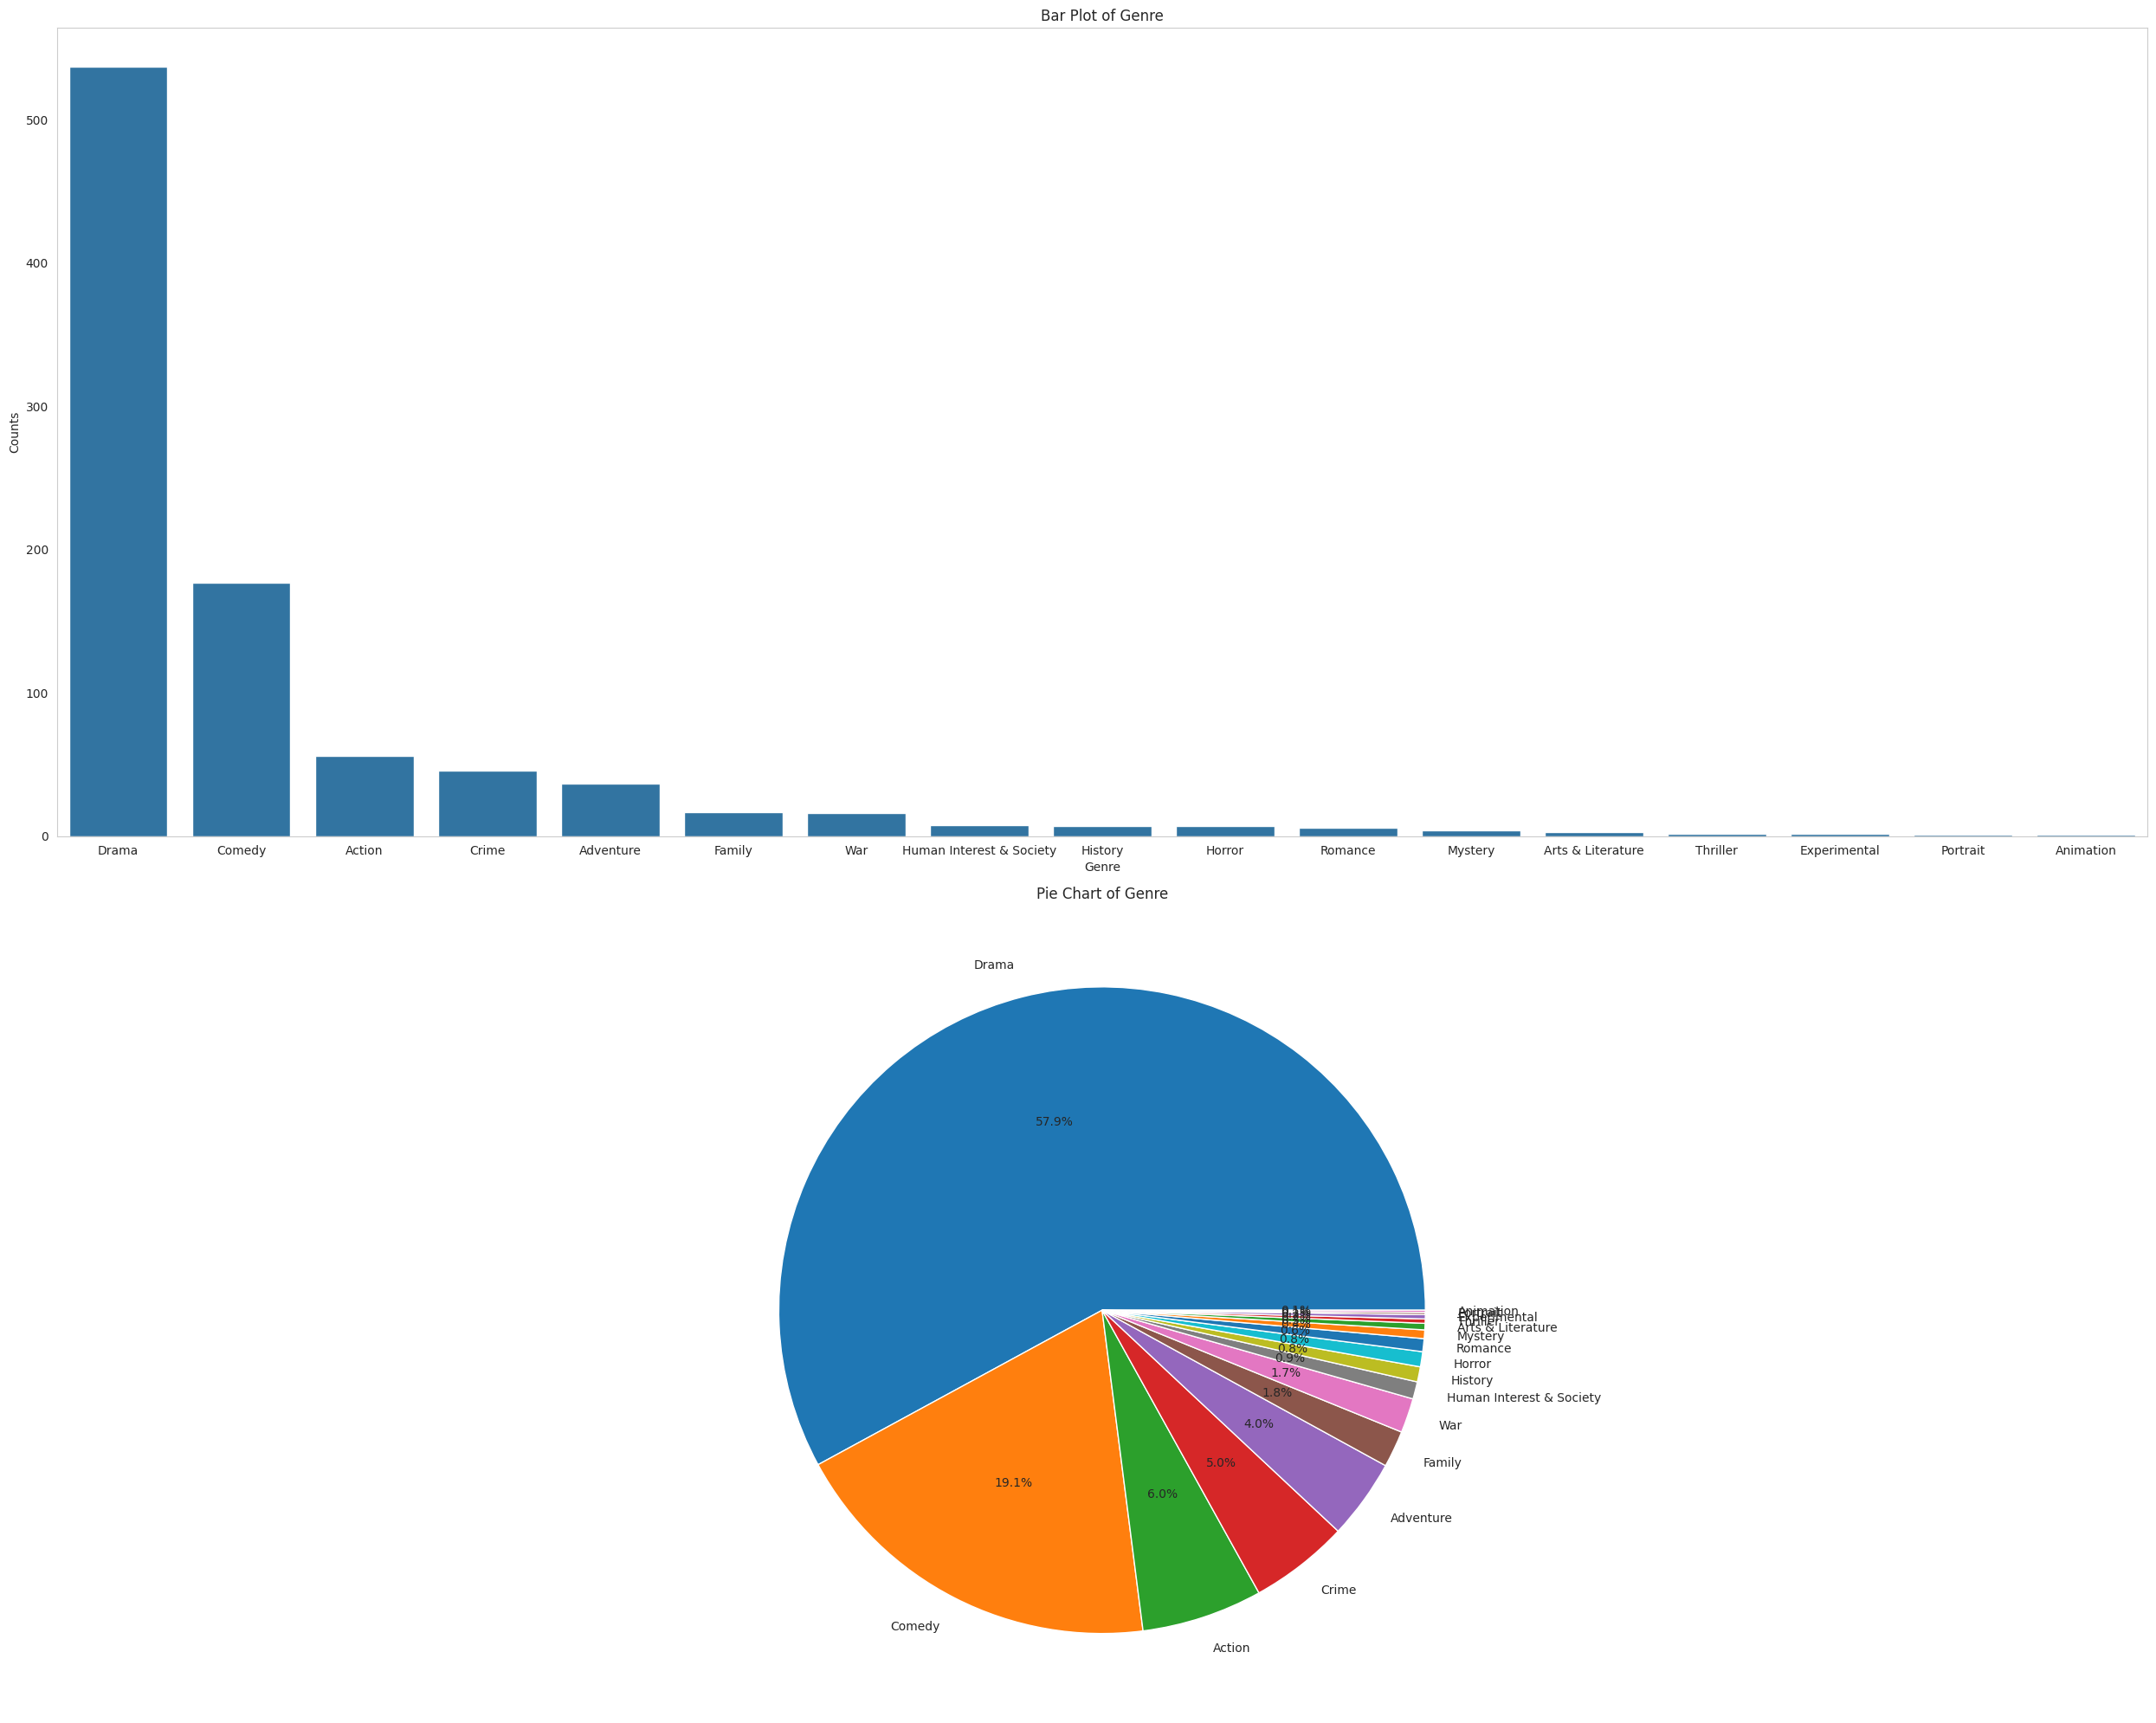

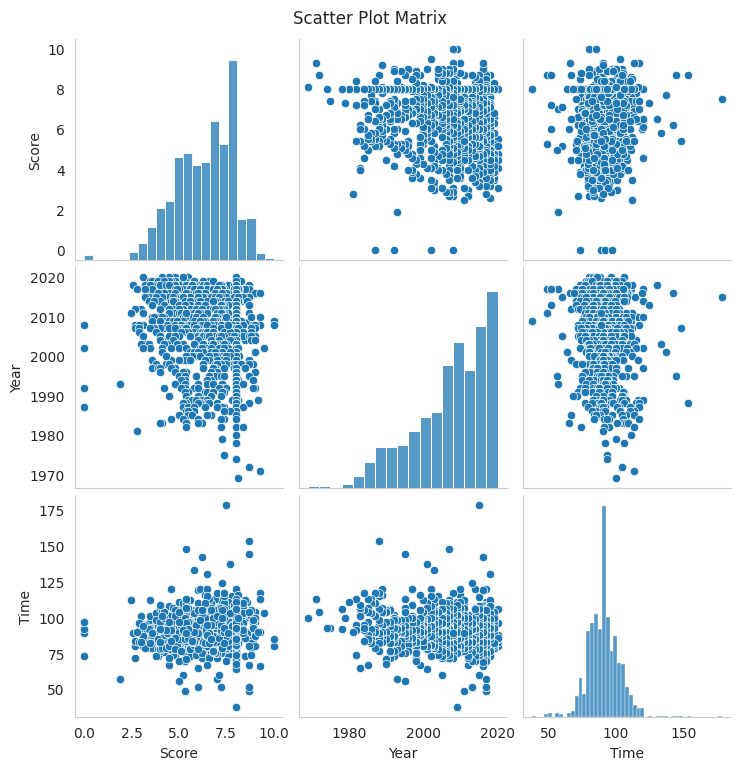

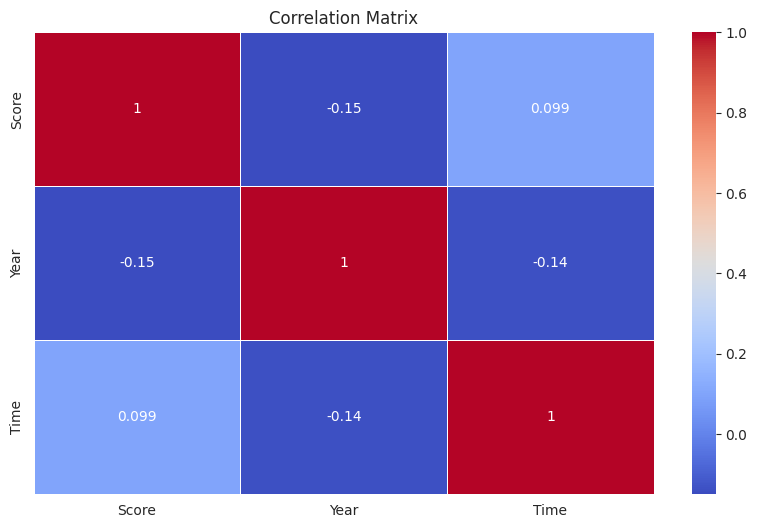

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feel free to add any desired methods to the class below this is a suggestion.
# Have fun trying to visualize your data

class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        """
        Plot histograms or density plots for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each numerical column.
        2. Create a histogram or density plot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        # Histogram plot
        sns.set_style("whitegrid", {'axes.grid': False})
        fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 8))
        for i, col in enumerate(numerical_cols):
          sns.histplot(self.df[col], kde=True, ax=axes[i])
          axes[i].set_title(f'Distribution Plot of {col}')

        # Density plot
        sns.set_style("whitegrid", {'axes.grid': False})
        fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 8))
        for i, col in enumerate(numerical_cols):
          sns.kdeplot(self.df[col], fill=True, ax=axes[i])
          axes[i].set_title(f'Density Plot of {col}')
        pass

    def plot_categorical(self, categorical_cols):
        """
        Create bar plots or pie charts for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each categorical column.
        2. Create a bar plot or pie chart for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in categorical_cols:
          value_counts = self.df[col].value_counts()

          sns.set_style("whitegrid", {'axes.grid': False})
          fig, axes = plt.subplots(2, len(categorical_cols), figsize=(25, 20))
          for i, col in enumerate(categorical_cols):
            value_counts = self.df[col].value_counts()

            # Bar plot
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0])
            plt.xticks(rotation=45)
            axes[0].set_title(f'Bar Plot of {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Counts')

            # Pie chart
            axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
            axes[1].set_title(f'Pie Chart of {col}')

          plt.tight_layout()
          plt.show()
        pass

    def plot_relationships(self, numerical_cols):
        """
        Generate scatter plots or correlation matrices to explore relationships between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Create a scatter plot matrix or correlation matrix for the numerical columns using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plots.
        3. Display the plots.
        """
        sns.set_style("whitegrid", {'axes.grid': False})

        # Scatter plot matrix
        sns.pairplot(self.df[numerical_cols])
        plt.suptitle('Scatter Plot Matrix', y=1.02)
        plt.show()
        print("\n")

        # Correlation matrix
        correlation_matrix = self.df[numerical_cols].corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()
        pass

# Example usage
numerical_cols = ['Score', 'Year', 'Time']
categorical_cols = ['Genre']

# Assuming you have a pandas DataFrame named 'df'
viz = DataVisualization(df)

viz.plot_histograms(numerical_cols)
viz.plot_categorical(categorical_cols)
viz.plot_relationships(numerical_cols)

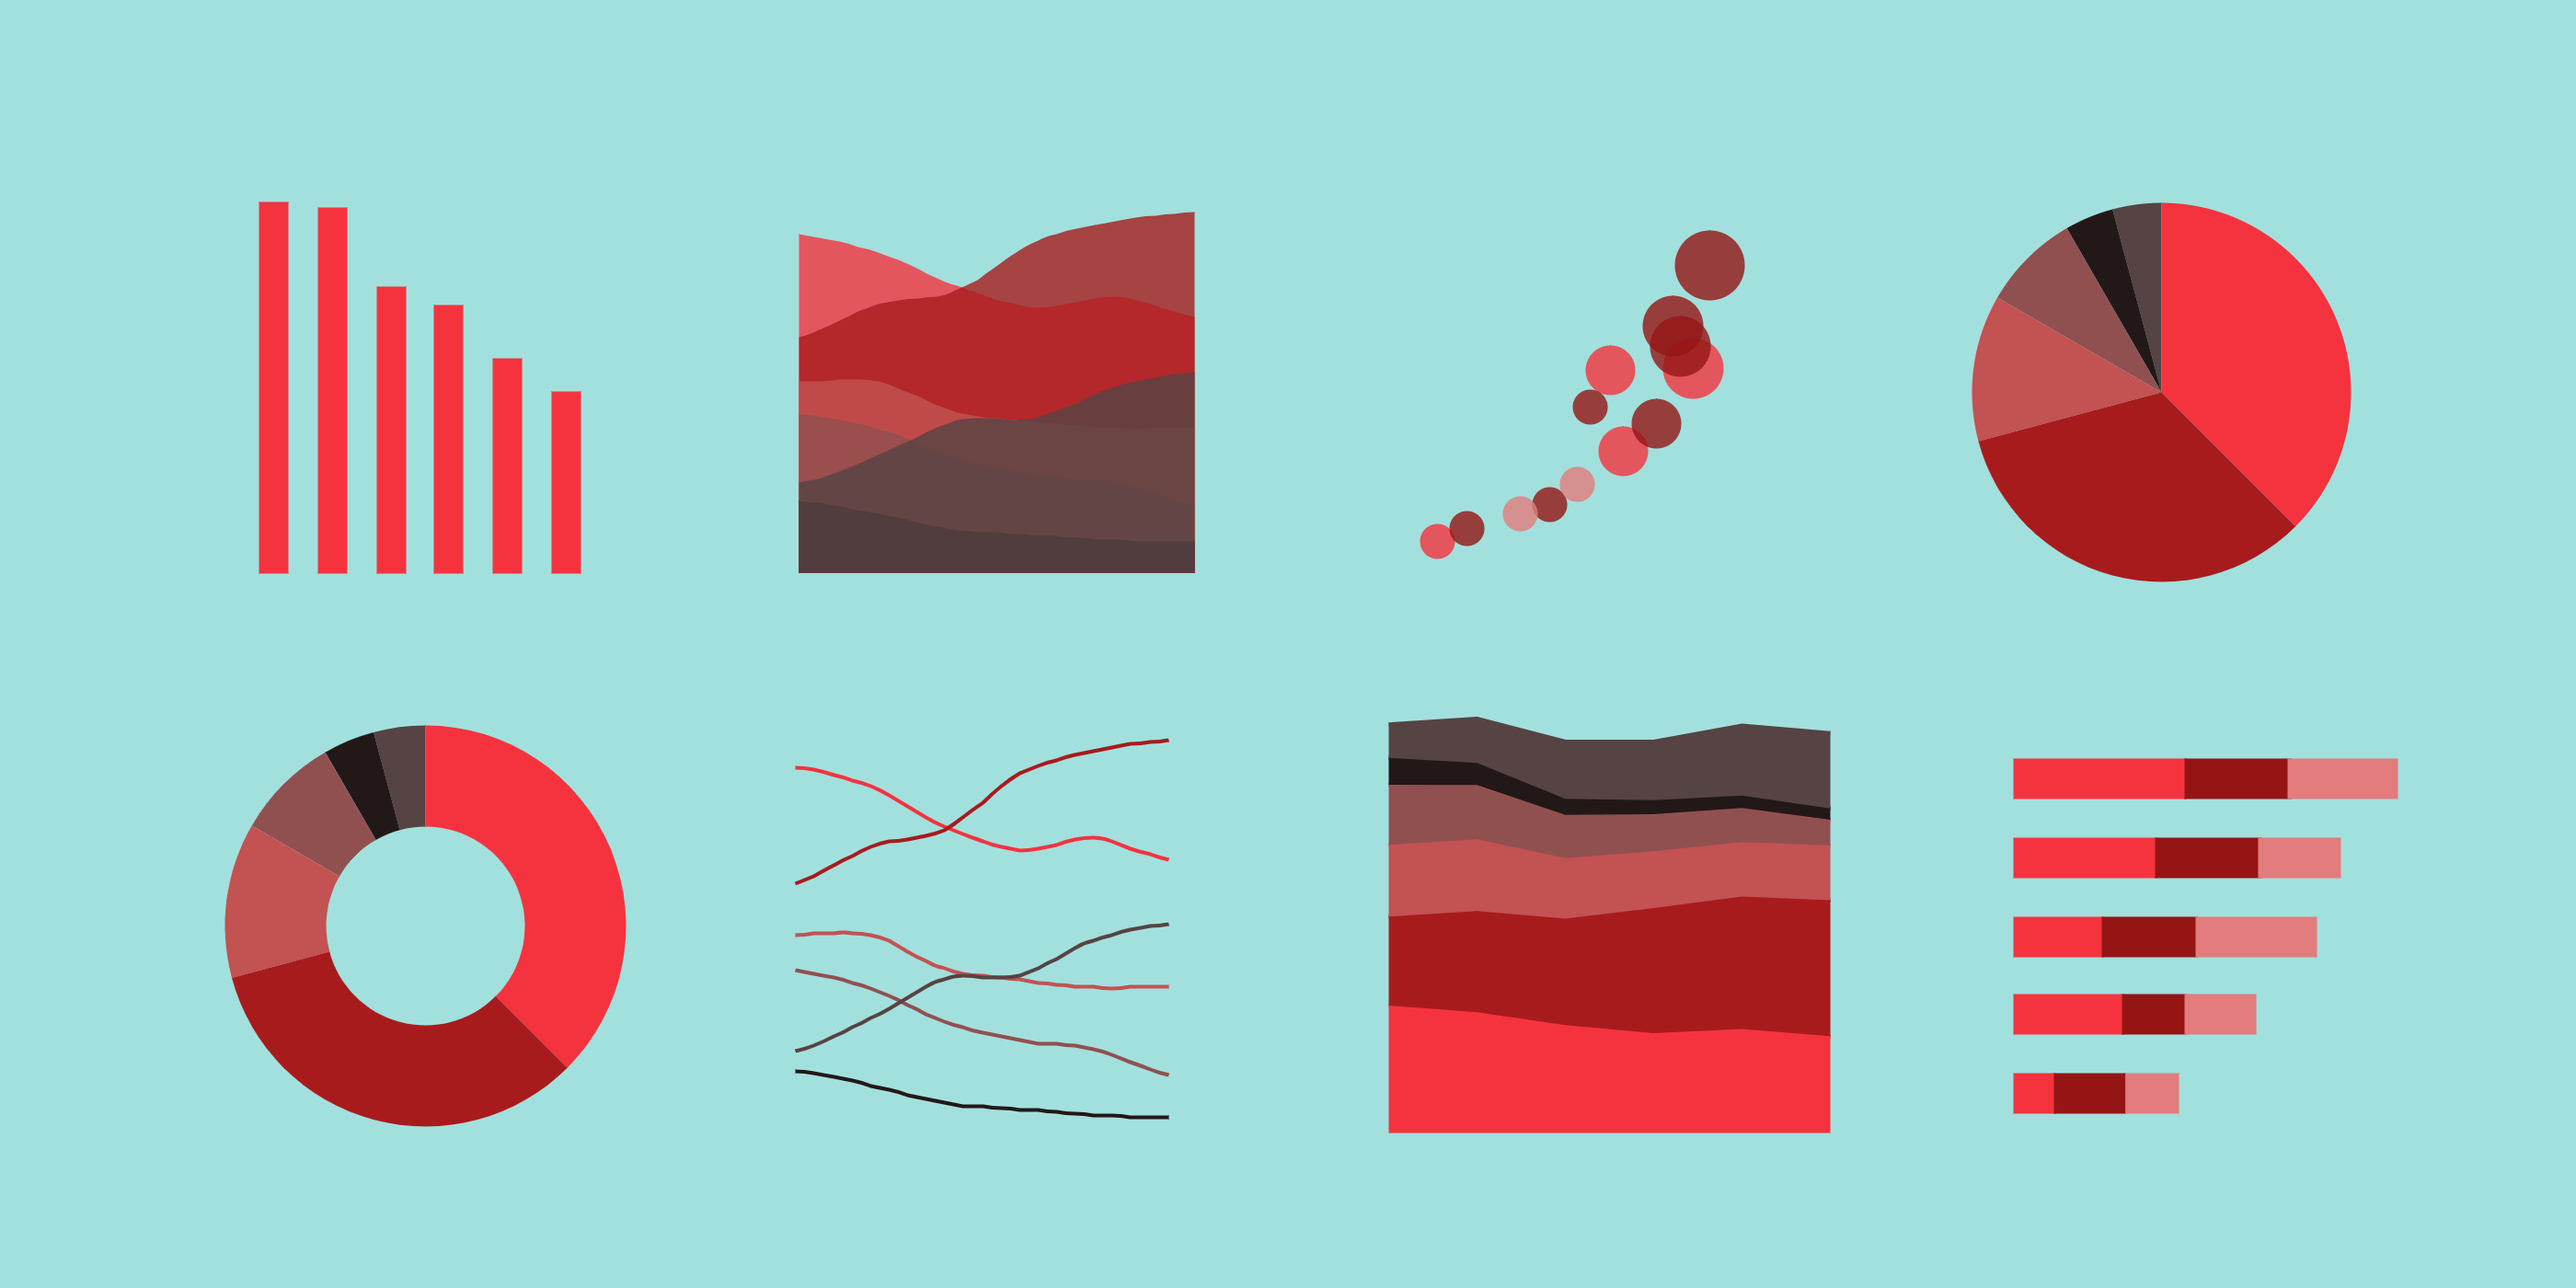

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

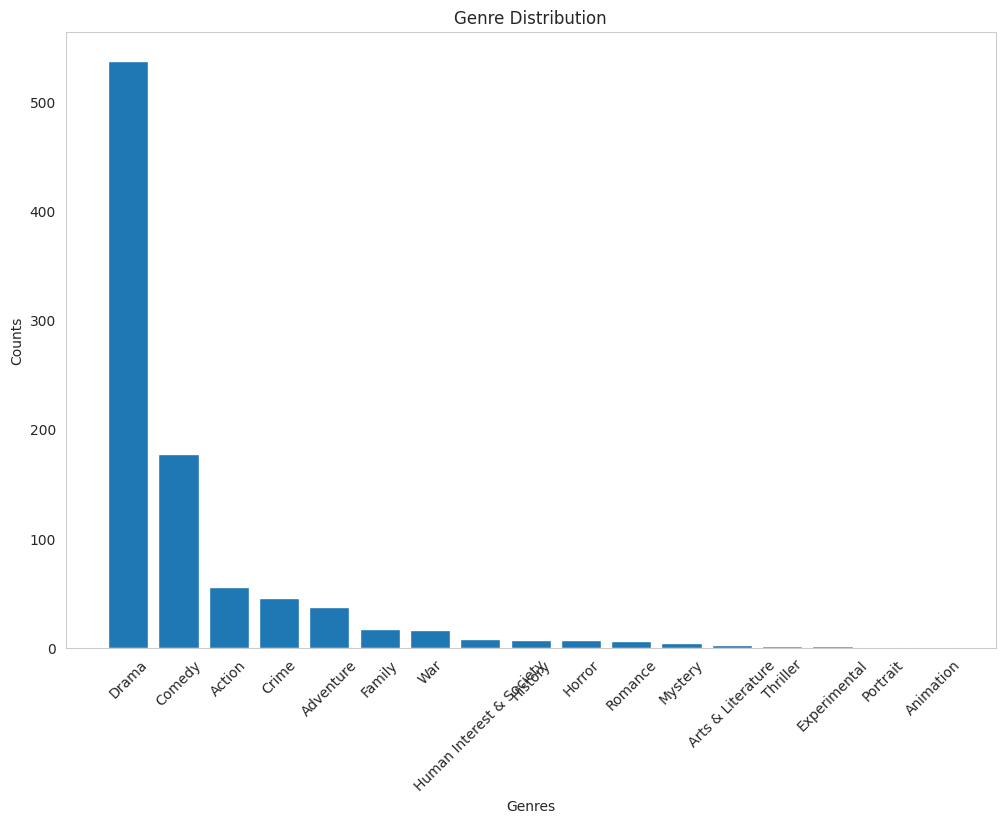

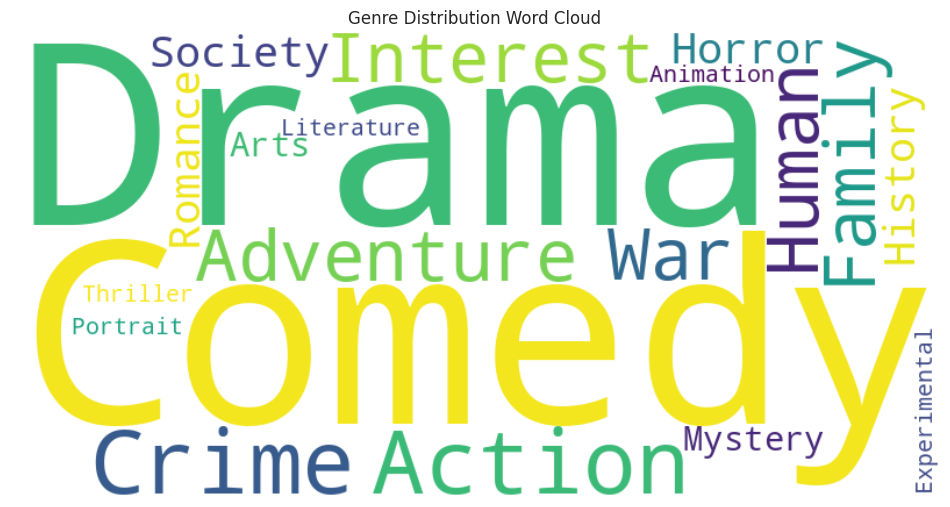

frequent persian words by genre:

Genre: Action
Top 10 most frequent words in initial summaries:
Word: و, Count: 303
Word: به, Count: 269
Word: می, Count: 225
Word: در, Count: 181
Word: از, Count: 162
Word: را, Count: 158
Word: که, Count: 150
Word: با, Count: 113
Word: او, Count: 72
Word: این, Count: 52
Top 10 most frequent words in preprocessed summaries:
Word: نام, Count: 21
Word: دست, Count: 19
Word: زندگی, Count: 16
Word: ایران, Count: 15
Word: پیمان, Count: 14
Word: سفر, Count: 14
Word: گروه, Count: 13
Word: هواپیما, Count: 13
Word: قرار, Count: 12
Word: همسرش, Count: 12


Genre: Adventure
Top 10 most frequent words in initial summaries:
Word: و, Count: 140
Word: به, Count: 127
Word: می, Count: 103
Word: در, Count: 83
Word: از, Count: 71
Word: که, Count: 71
Word: را, Count: 61
Word: با, Count: 45
Word: او, Count: 33
Word: آن, Count: 29
Top 10 most frequent words in preprocessed summaries:
Word: محبوبه, Count: 13
Word: تصمیم, Count: 12
Word: داستان, Count: 11
Word: پدر, Count: 11
W

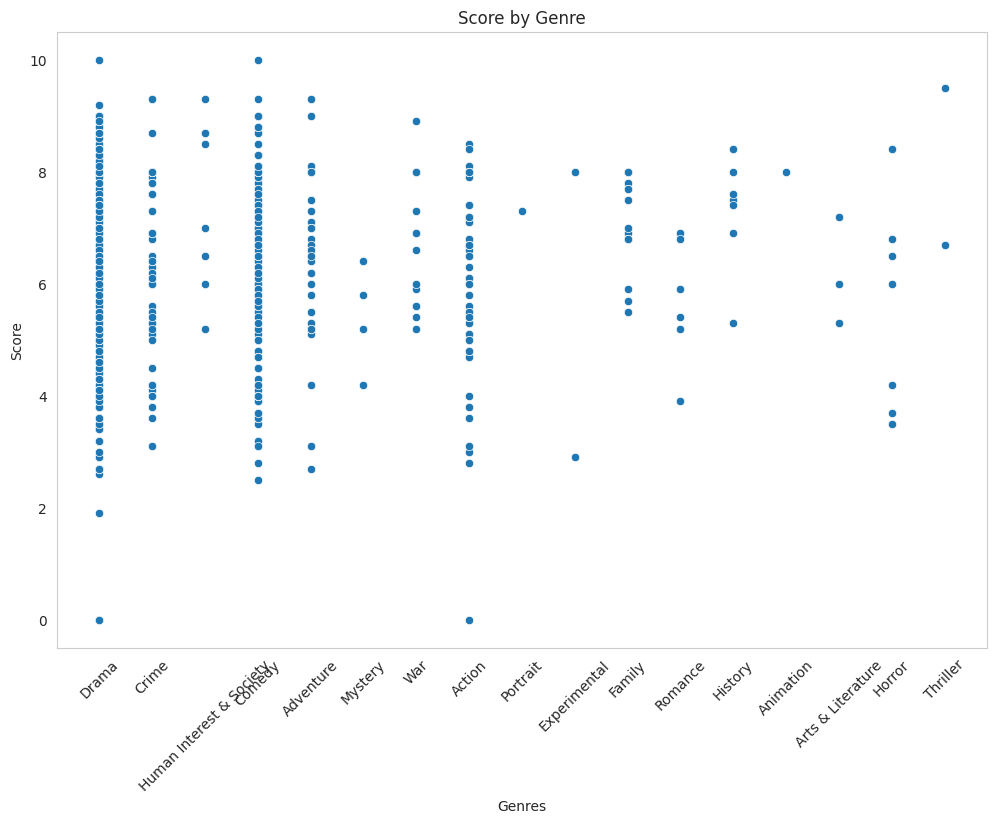

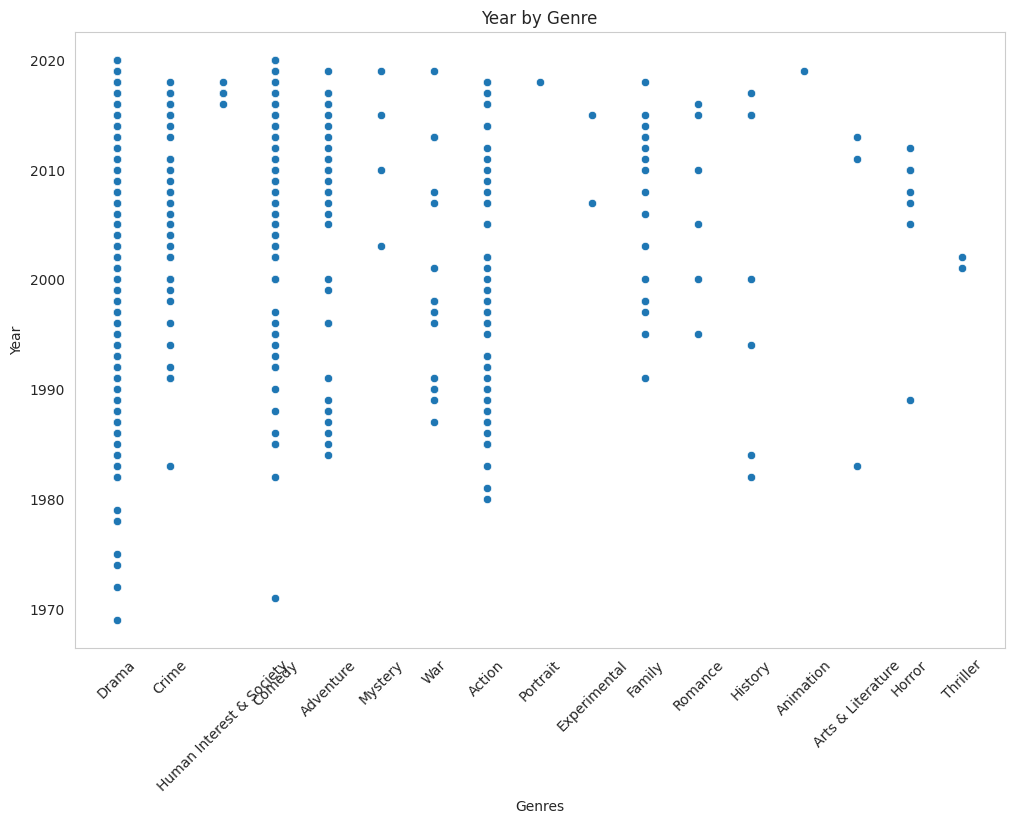

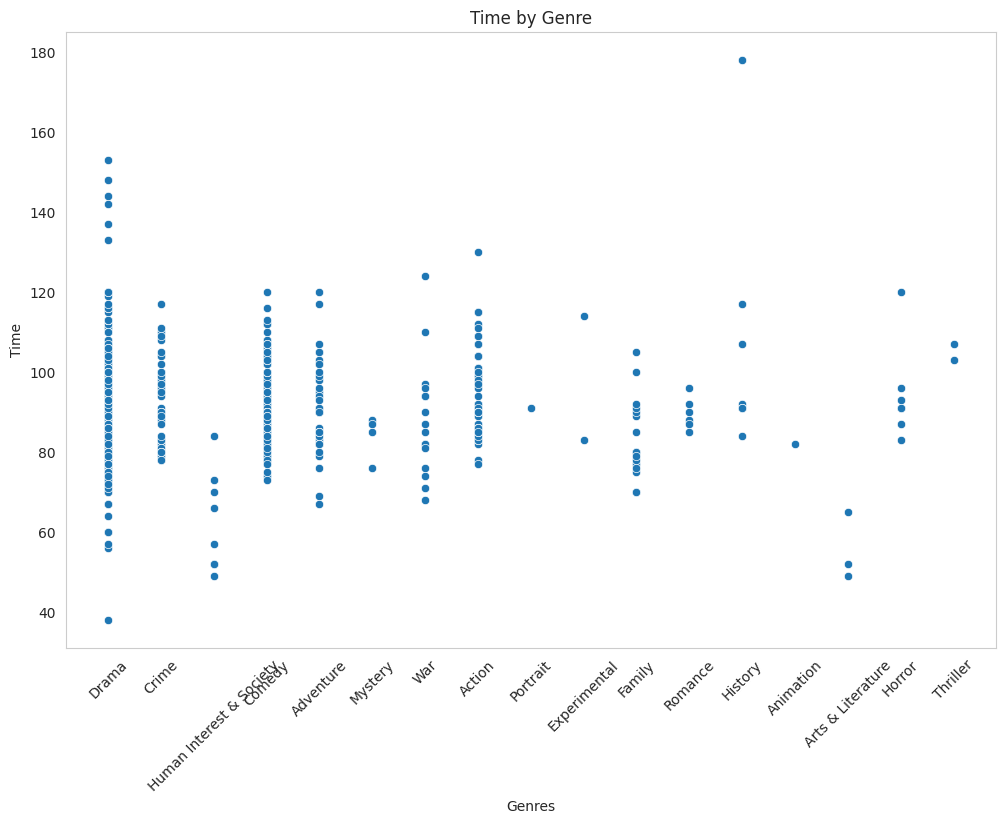

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi import algorithm as bidi_algorithm

class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        """
        Create a word cloud or bar plot for genre distribution.

        Args:
            column (str): The column name containing the genre information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the data is in Persian or English.
        2. If the data is in Persian, use the bidi library to handle right-to-left text direction.
        3. Create a word cloud or bar plot for the genre distribution using Matplotlib or Seaborn.
        4. Set appropriate titles and labels for the plot.
        5. Display the plot.
        """
        if column == 'Genre':
            genre_counts = self.df[column].value_counts()
            plt.figure(figsize=(12, 8))
            plt.bar(genre_counts.index, genre_counts.values)
            plt.xlabel('Genres')
            plt.ylabel('Counts')
            plt.title('Genre Distribution')
            plt.xticks(rotation=45)
            plt.show()

            # Word cloud
            genre_text = ' '.join(genre_counts.index)
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
            plt.figure(figsize=(12, 8))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('Genre Distribution Word Cloud')
            plt.show()
        pass

    def frequent_words_by_genre(self, content_column, genre_column):
        """
        Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the top 10 most frequent words for each genre)

        TODO:
        1. Group the data by genre.
        2. For each genre:
            a. Get the top 10 most frequent words from the initial summaries.
            b. Get the top 10 most frequent words from the preprocessed summaries (if available).
            c. Print the top 10 frequent words for both cases.
        """

        for genre, group in self.df.groupby(genre_column):
            print(f"Genre: {genre}")
            print("Top 10 most frequent words in initial summaries:")
            content = ' '.join(group[content_column].dropna())
            if (content_column == 'Content_2'):
                words = re.findall(r'\b[a-zA-Z]+\b', content.lower())
            else :
                words = content.split()
            word_counts = Counter(words)
            for word, count in word_counts.most_common(10):
                print(f"Word: {word}, Count: {count}")

            print("Top 10 most frequent words in preprocessed summaries:")
            preprocessed_content = ' '.join(group['Preprocessed_Persian' if content_column == 'Content_1' else 'Preprocessed_English'].dropna())
            words = preprocessed_content.split()
            word_counts = Counter(words)
            for word, count in word_counts.most_common(10):
                print(f"Word: {word}, Count: {count}")
            print("\n")



        pass

    def analyze_genre_distribution(self, genre_column):
        """
        Analyze the distribution of movies across genres.

        Args:
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the analysis of genre distribution)

        TODO:
        1. Calculate the count of movies for each genre.
        2. Determine the most and least popular genres based on the movie count.
        3. Print the analysis of genre distribution, including the most and least popular genres.
        """
        genre_counts = self.df[genre_column].value_counts()
        most_popular_genre = genre_counts.idxmax()
        least_popular_genre = genre_counts.idxmin()

        print("Analysis of Genre Distribution:")
        print(f"Most Popular Genre: {most_popular_genre}, Count: {genre_counts.max()}")
        print(f"Least Popular Genre: {least_popular_genre}, Count: {genre_counts.min()}")
        pass

    def explore_genre_relationships(self, genre_column, other_columns):
        """
        Explore the relationship between genres and other variables.

        Args:
            genre_column (str): The column name containing the genre information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between genres and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            if col in self.df.columns:
                if self.df[col].dtype == 'object':
                    # Bar plot
                    plt.figure(figsize=(12, 8))
                    sns.barplot(x=genre_column, y=col, data=self.df)
                    plt.xlabel('Genres')
                    plt.ylabel(col)
                    plt.title(f'{col} by Genre')
                    plt.xticks(rotation=45)
                    plt.show()
                else:
                    # Scatter plot
                    plt.figure(figsize=(12, 8))
                    sns.scatterplot(x=genre_column, y=col, data=self.df)
                    plt.xlabel('Genres')
                    plt.ylabel(col)
                    plt.title(f'{col} by Genre')
                    plt.xticks(rotation=45)
                    plt.show()
        pass


genre_analysis = GenreAnalysis(df)

genre_column = 'Genre'
content_column = 'Content_2'
other_columns = ['Score', 'Year', 'Time']

genre_analysis.visualize_genre_distribution(genre_column)

print("frequent persian words by genre:\n")
genre_analysis.frequent_words_by_genre('Content_1', genre_column)
print("\n")
print("frequent english words by genre:\n")
genre_analysis.frequent_words_by_genre(content_column, genre_column)
print("\n")

genre_analysis.analyze_genre_distribution(genre_column)
genre_analysis.explore_genre_relationships(genre_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.

## Answer

In my analysis, I found drama films to be overwhelmingly popular, with 537 compared to just 1 animation film. This trend, reflecting a preference for drama over war or action, is intriguing. Common words like "life," "find," and "family" in dramas highlight a focus on personal themes. This has led me to plan sentiment analysis on reviews to understand this preference and explore why genres like animation are less favored.


###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

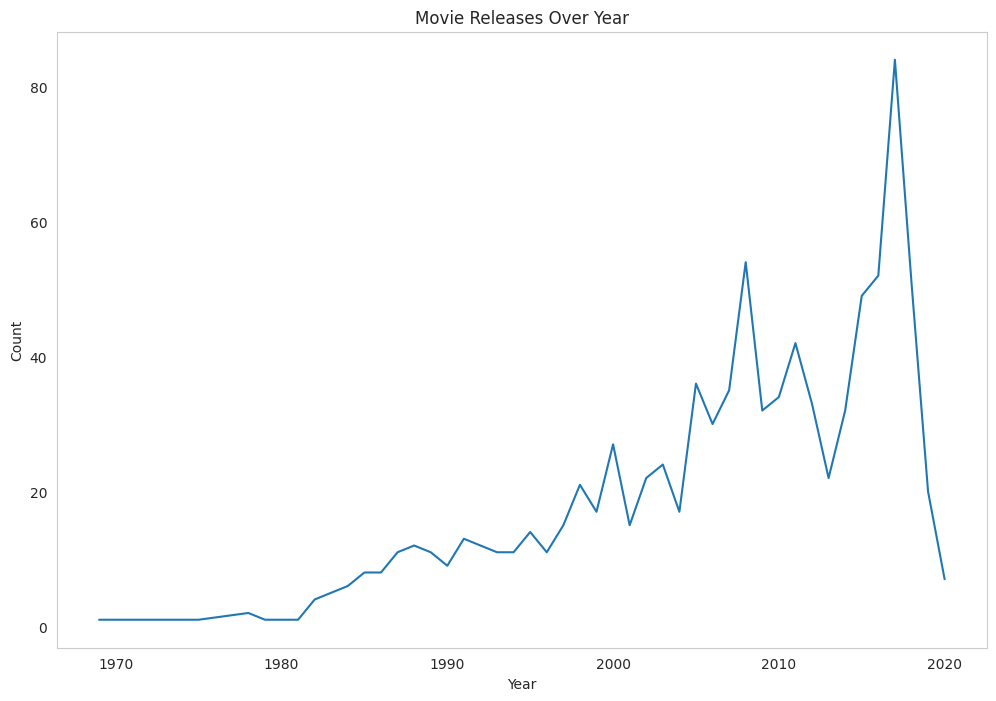

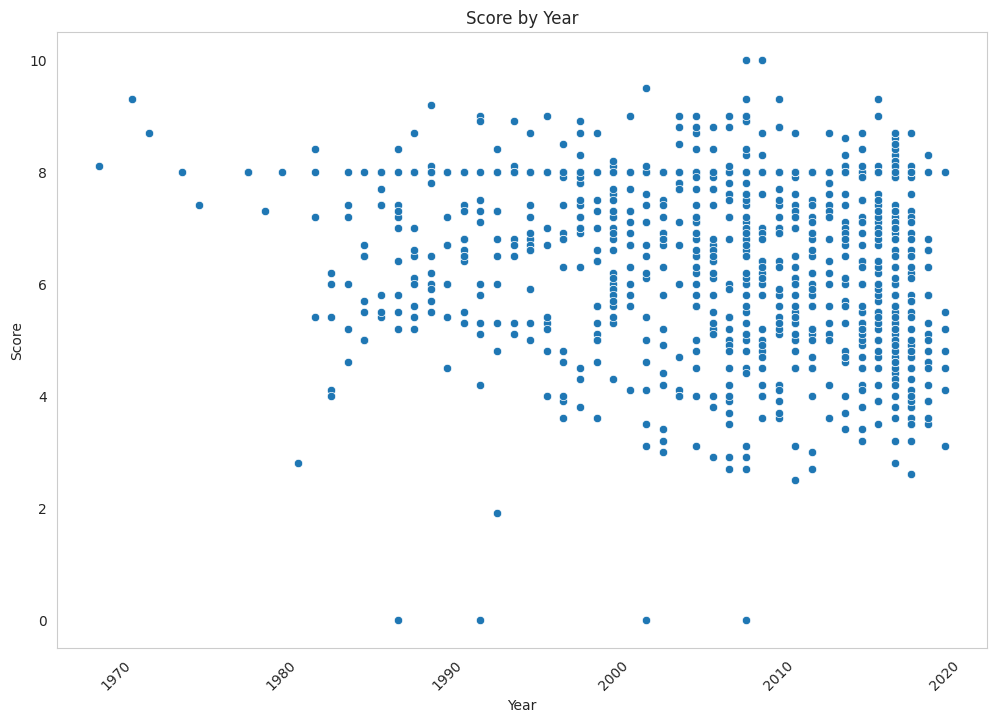

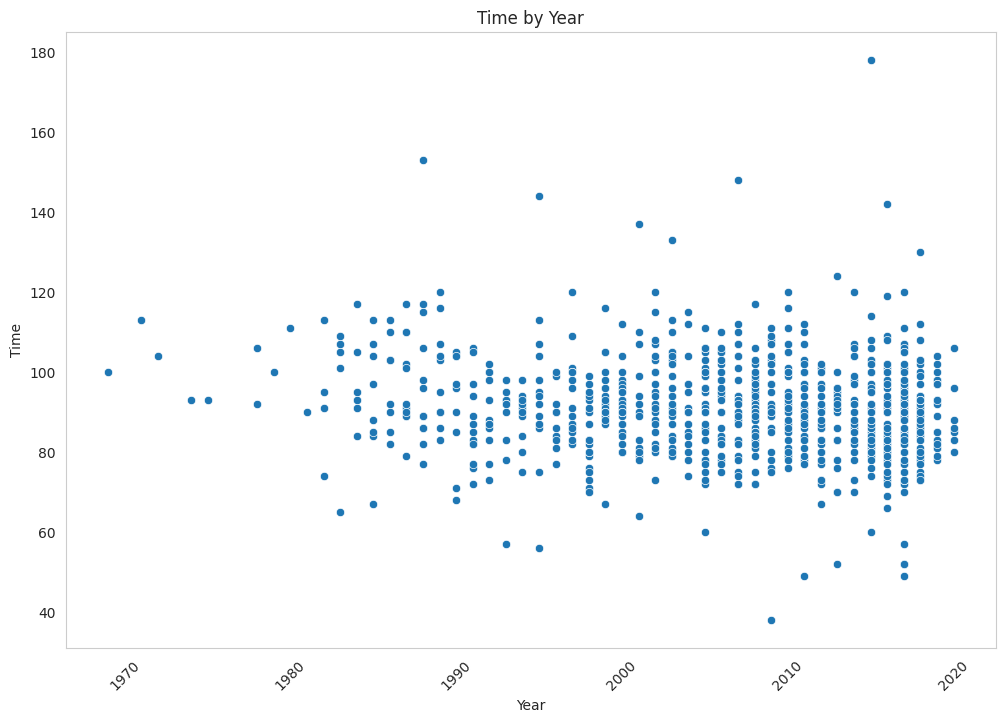

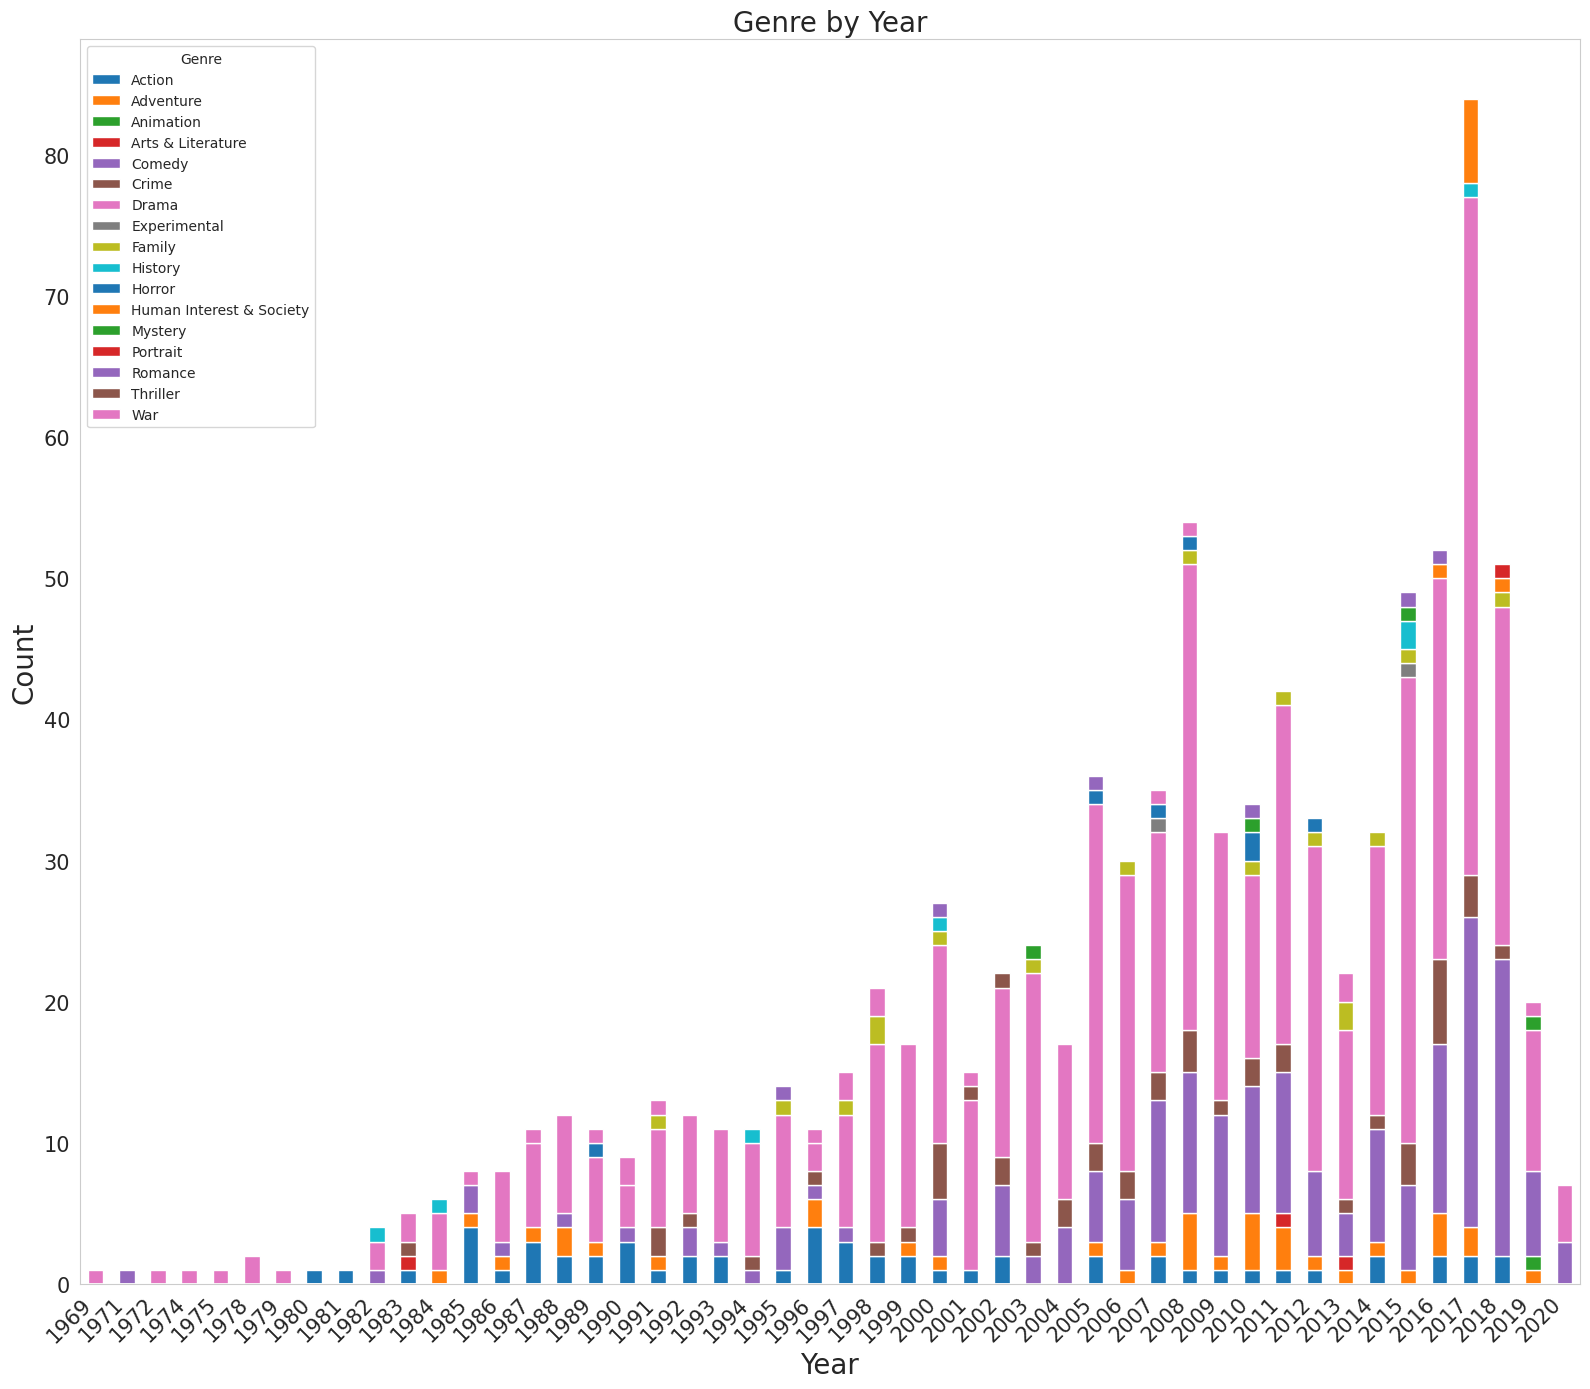

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        """
        Plot line or bar charts for movie releases over time.

        Args:
            time_column (str): The column name containing the time or release year information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the time_column contains continuous time data (e.g., years) or discrete time data (e.g., decades).
        2. Create a line or bar chart to show the distribution of movie releases over time using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        if self.df[time_column].dtype == 'int':
            # Line plot
            plt.figure(figsize=(12, 8))
            sns.lineplot(x=self.df[time_column].value_counts().index, y=self.df[time_column].value_counts().values)
            plt.xlabel('Year')
            plt.ylabel('Count')
            plt.title('Movie Releases Over Year')
            plt.show()
        else:
            # Bar plot
            plt.figure(figsize=(12, 8))
            sns.barplot(x=self.df[time_column].value_counts().index, y=self.df[time_column].value_counts().values)
            plt.xlabel('Decade')
            plt.ylabel('Count')
            plt.title('Movie Releases Over Year')
            plt.show()

        pass

    def explore_time_relationships(self, time_column, other_columns):
        """
        Analyze the relationship between release time and other variables.

        Args:
            time_column (str): The column name containing the time or release year information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between release time and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            if col in self.df.columns:
                if self.df[col].dtype == 'object' or self.df[col].dtype == 'category':
                    # Bar plot
                    plt.figure(figsize=(16,14))

                    # Group by the specified columns and plot the stacked bar chart
                    df_grouped = df.groupby([time_column, col]).size().unstack(fill_value=0)
                    df_grouped.plot(kind='bar', stacked=True, ax=plt.gca())

                    # Set the title and labels with specified font sizes
                    plt.title(f'{col} by Year', fontsize=20)
                    plt.xlabel(time_column, fontsize=20)
                    plt.ylabel('Count', fontsize=20)

                    # Adjust the x-ticks for better readability and set their font size
                    plt.xticks(rotation=45, ha='right', fontsize=15)
                    plt.yticks(fontsize=15)

                    # Adjust the layout to prevent overlap
                    plt.tight_layout()

                    # Display the plot
                    plt.show()
                else:
                    # Scatter plot
                    plt.figure(figsize=(12, 8))
                    sns.scatterplot(x=time_column, y=col, data=self.df)
                    plt.xlabel('Year')
                    plt.ylabel(col)
                    plt.title(f'{col} by Year')
                    plt.xticks(rotation=45)
                    plt.show()
        pass


# Assuming you have a pandas DataFrame named 'df'
time_analysis = TimeAnalysis(df)
time_column = 'Year'
other_columns = ['Score', 'Time', 'Genre']
time_analysis.plot_movie_releases(time_column)
time_analysis.explore_time_relationships(time_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

## Answer

The growth of the movie industry has resulted in a boom in film production. Movies have evolved from being purely artistic expressions to becoming significant commercial ventures. Consequently, we see fewer older films, but the ones that remain tend to have better ratings compared to more recent releases.

###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


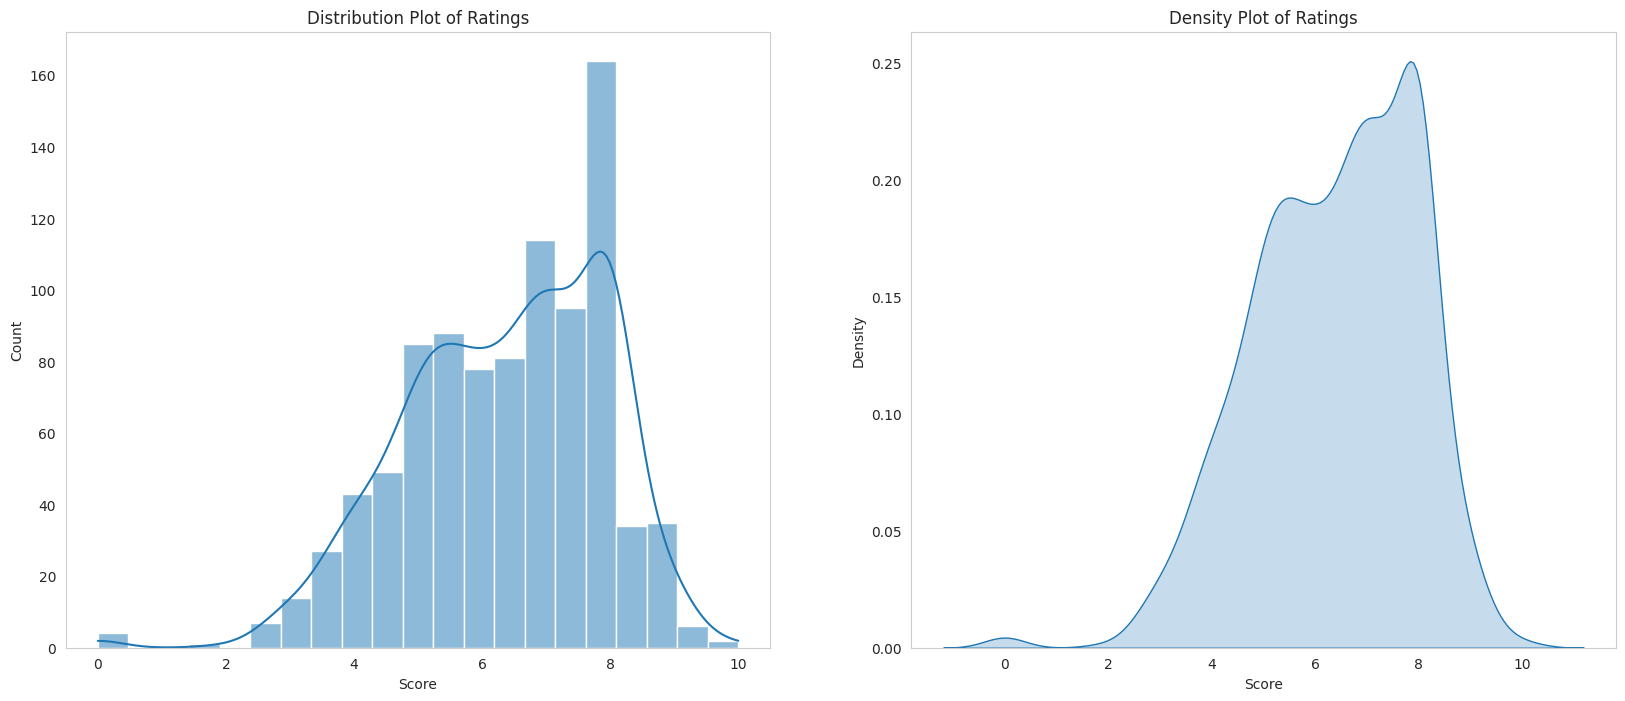

Frequent Persian Words by Rating:

Rating: 0.0
Top 10 most frequent words in initial summaries:
Word: و, Count: 33
Word: به, Count: 26
Word: می, Count: 22
Word: از, Count: 18
Word: که, Count: 18
Word: را, Count: 17
Word: در, Count: 15
Word: با, Count: 14
Word: ناهید, Count: 12
Word: او, Count: 10
Top 10 most frequent words in preprocessed summaries:
Word: ناهید, Count: 12
Word: پرویز, Count: 11
Word: محسن, Count: 10
Word: توکیو, Count: 5
Word: قصد, Count: 4
Word: زندگی, Count: 4
Word: مسعود, Count: 3
Word: پاییزان, Count: 3
Word: همسر, Count: 3
Word: غریبه, Count: 3


Rating: 1.9
Top 10 most frequent words in initial summaries:
Word: چکمه, Count: 2
Word: که, Count: 2
Word: دخترکی, Count: 1
Word: فکر, Count: 1
Word: می, Count: 1
Word: کند, Count: 1
Word: هایی, Count: 1
Word: تازه, Count: 1
Word: خریده, Count: 1
Word: است, Count: 1
Top 10 most frequent words in preprocessed summaries:
Word: دخترکی, Count: 1
Word: چکمه‌هایی, Count: 1
Word: تازه, Count: 1
Word: خریده_است, Count: 1
Word: زی

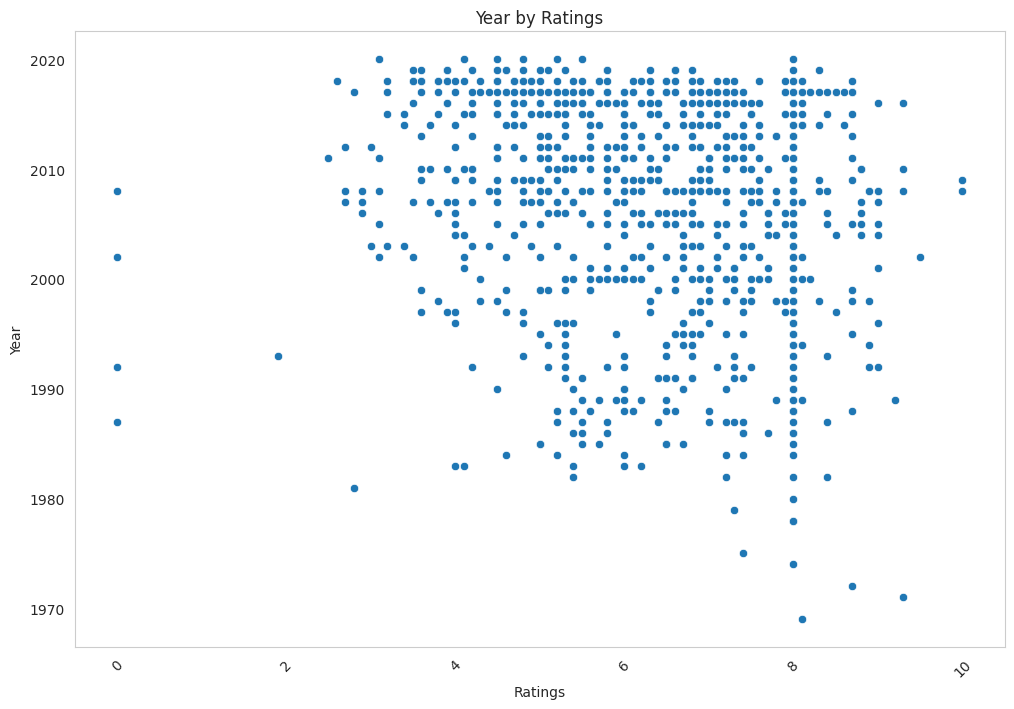

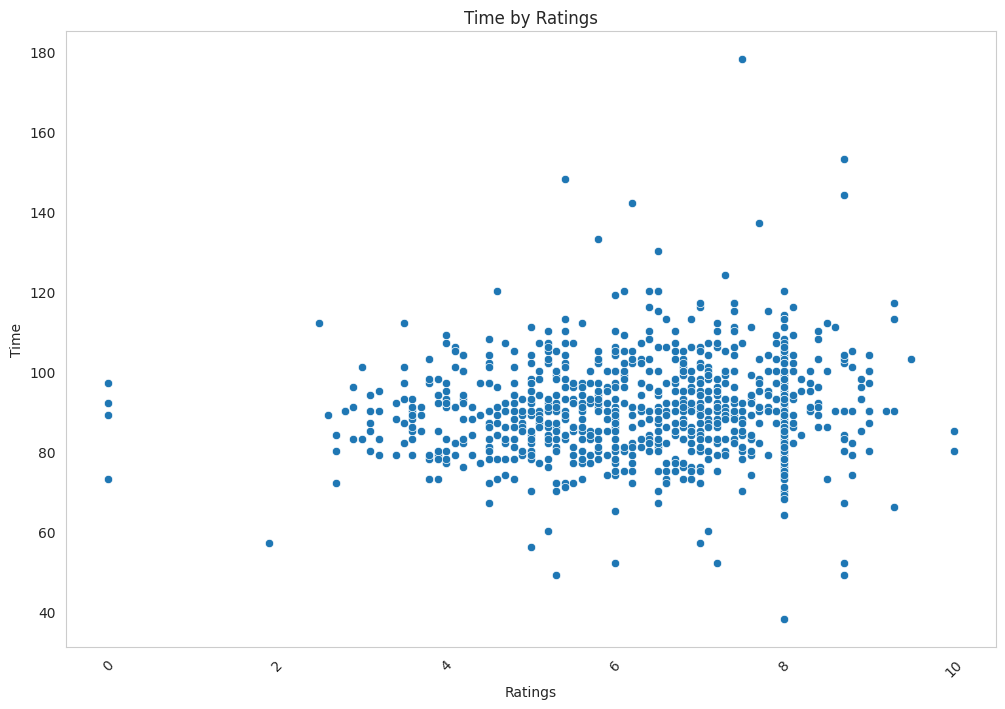

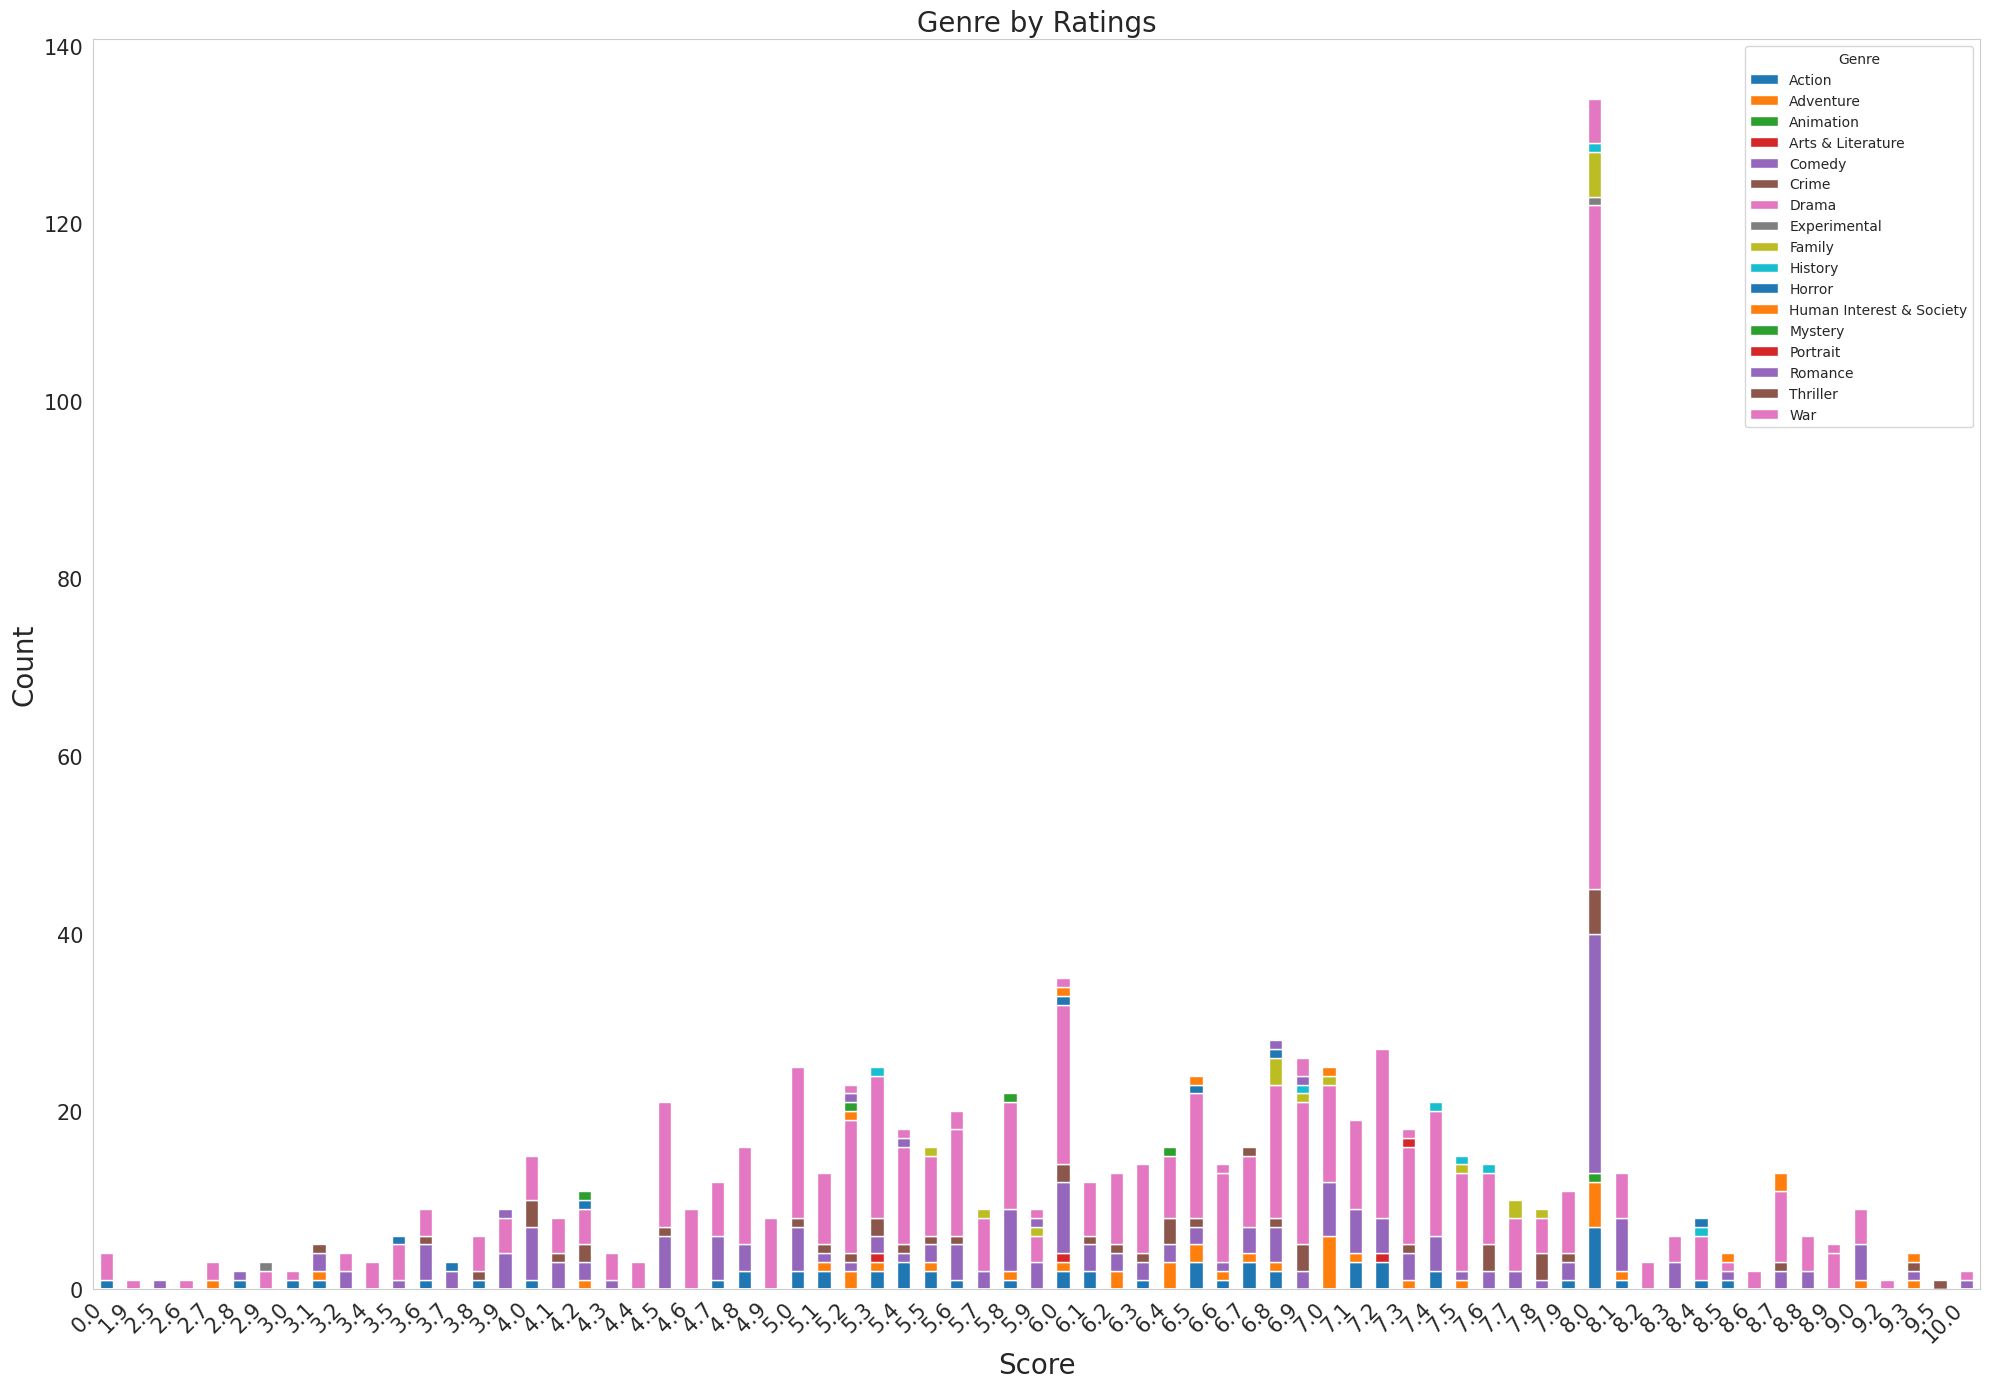

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        """
        Visualize the distribution of ratings.

        Args:
            rating_column (str): The column name containing the rating information.

        Returns:
            None (displays the plot)

        TODO:
        1. Create a histogram or density plot to visualize the distribution of ratings using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plot.
        3. Display the plot.
        """

        sns.set_style("whitegrid", {'axes.grid': False})
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        sns.histplot(self.df[rating_column], kde=True, ax=axes[0])
        axes[0].set_title('Distribution Plot of Ratings')
        sns.kdeplot(self.df[rating_column], fill=True, ax=axes[1])
        axes[1].set_title('Density Plot of Ratings')
        plt.show()

        pass

    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        """
        Obtain the 10 most frequently occurring words for each rating, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            rating_column (str): The column name containing the rating information.
            n (int): The number of most frequent words to obtain (default is 10).

        Returns:
            None (prints the top n frequent words for each rating)

        TODO:
        1. Group the data by rating.
        2. For each rating:
            a. Get the top n most frequent words from the initial summaries.
            b. Get the top n most frequent words from the preprocessed summaries (if available).
            c. Print the top n frequent words for both cases.
        """
        for rating, group in self.df.groupby(rating_column):
            print(f"Rating: {rating}")
            print("Top 10 most frequent words in initial summaries:")
            content = ' '.join(group[content_column].dropna())
            if (content_column == 'Content_2'):
                words = re.findall(r'\b[a-zA-Z]+\b', content.lower())
            else :
                words = content.split()
            word_counts = Counter(words)
            for word, count in word_counts.most_common(n):
                print(f"Word: {word}, Count: {count}")

            print("Top 10 most frequent words in preprocessed summaries:")
            preprocessed_content = ' '.join(group['Preprocessed_Persian' if content_column == 'Content_1' else 'Preprocessed_English'].dropna())
            words = preprocessed_content.split()
            word_counts = Counter(words)
            for word, count in word_counts.most_common(n):
                print(f"Word: {word}, Count: {count}")
            print("\n")

        pass

    def explore_rating_relationships(self, rating_column, other_columns):
        """
        Explore the relationship between ratings and other variables.

        Args:
            rating_column (str): The column name containing the rating information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between ratings and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            if col in self.df.columns:
                if self.df[col].dtype == 'object':
                    # Bar plot
                    plt.figure(figsize=(20,14))

                    # Group by the specified columns and plot the stacked bar chart
                    df_grouped = df.groupby([rating_column, col]).size().unstack(fill_value=0)
                    df_grouped.plot(kind='bar', stacked=True, ax=plt.gca())

                    # Set the title and labels with specified font sizes
                    plt.title(f'{col} by Ratings', fontsize=20)
                    plt.xlabel(rating_column, fontsize=20)
                    plt.ylabel('Count', fontsize=20)

                    # Adjust the x-ticks for better readability and set their font size
                    plt.xticks(rotation=45, ha='right', fontsize=15)
                    plt.yticks(fontsize=15)

                    # Adjust the layout to prevent overlap
                    plt.tight_layout()

                    # Display the plot
                    plt.show()
                else:
                    # Scatter plot
                    plt.figure(figsize=(12, 8))
                    sns.scatterplot(x=rating_column, y=col, data=self.df)
                    plt.xlabel('Ratings')
                    plt.ylabel(col)
                    plt.title(f'{col} by Ratings')
                    plt.xticks(rotation=45)
                    plt.show()
        pass



rating_analysis = RatingAnalysis(df)

rating_column = 'Score'
content_column = 'Content_2'
other_columns = ['Year', 'Time', 'Genre']
rating_analysis.visualize_rating_distribution(rating_column)

print("Frequent Persian Words by Rating:\n")
rating_analysis.frequent_words_by_rating('Content_1', rating_column)
print("\n")
print("Frequent English Words by Rating:\n")
rating_analysis.frequent_words_by_rating(content_column, rating_column)
print("\n")

rating_analysis.explore_rating_relationships(rating_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

## Answer

The most intriguing discovery in this phase is that a significantly higher number of movies are rated 8 compared to other rankings. This could be because an 8 is perceived as a safe and favorable score, indicating a film that is very good but not flawless.

###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

Correlation Matrix:
          Score      Year      Time
Score  1.000000 -0.150009  0.099385
Year  -0.150009  1.000000 -0.140209
Time   0.099385 -0.140209  1.000000


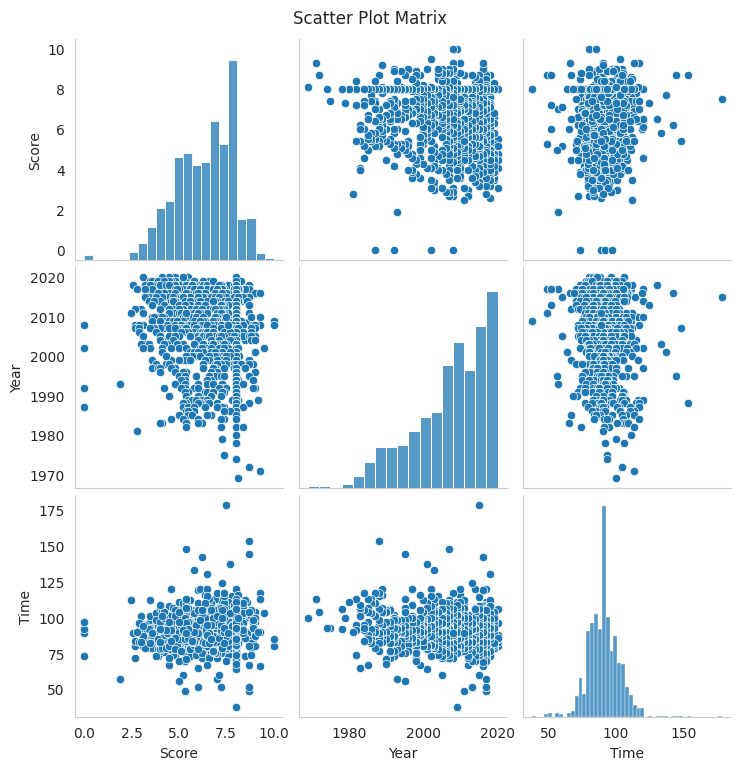

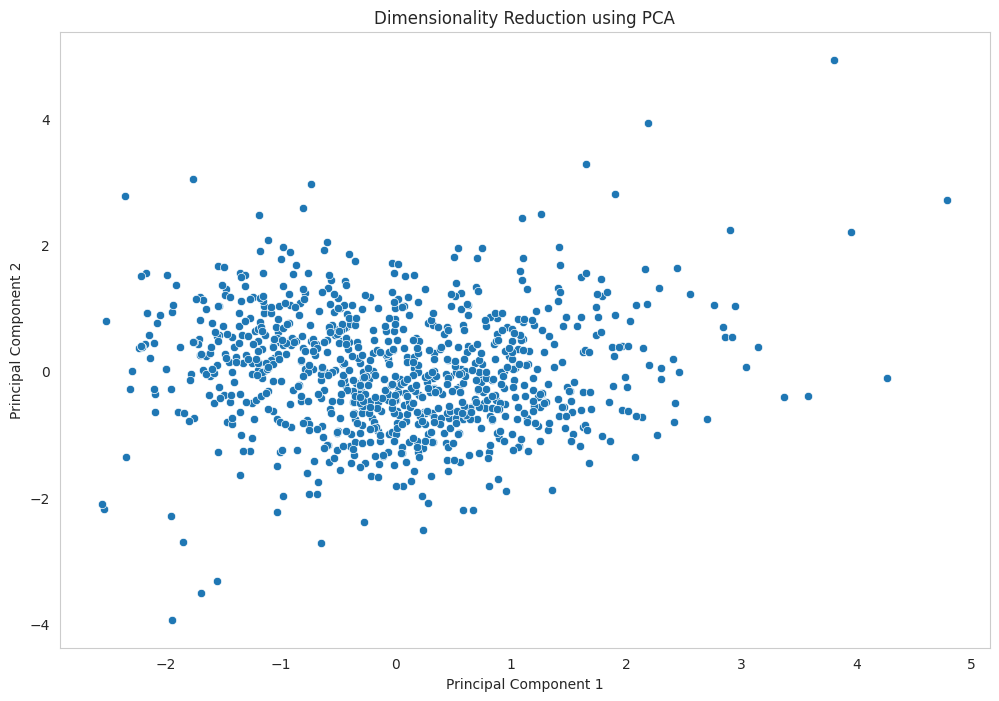

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Feel free to add any desired methods to the class below this is a suggestion.

class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        """
        Calculate correlation coefficients between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the correlation matrix)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Calculate the correlation matrix between the numerical columns.
        3. Print the correlation matrix.
        """
        correlation_matrix = self.df[numerical_cols].corr()
        print("Correlation Matrix:")
        print(correlation_matrix)

        pass

    def visualize_multivariate(self, numerical_cols):
        """
        Use scatter plot matrices or pair plots for multivariate visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the multivariate plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Create a scatter plot matrix or pair plot using Matplotlib or Seaborn for multivariate visualization.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        sns.set_style("whitegrid", {'axes.grid': False})

        # Scatter plot matrix
        sns.pairplot(self.df[numerical_cols])
        plt.suptitle('Scatter Plot Matrix', y=1.02)
        plt.show()

        pass

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        """
        Employ dimensionality reduction techniques (e.g., PCA) for better visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.
            target_column (str, optional): The column name containing the target variable (if applicable).

        Returns:
            None (displays the dimensionality-reduced plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Perform standardization on the numerical data.
        3. Apply Principal Component Analysis (PCA) or another dimensionality reduction technique.
        4. If a target_column is provided, color the data points based on the target variable.
        5. Create a scatter plot for the first two principal components.
        6. Set appropriate titles and labels for the plot.
        7. Display the plot.
        """
        # Standardize the numerical data
        scaler = StandardScaler()
        numerical_data = self.df[numerical_cols]
        scaled_data = scaler.fit_transform(numerical_data)

        # Impute missing values
        imputer = SimpleImputer(strategy='mean')
        imputed_data = imputer.fit_transform(scaled_data)

        # Apply PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(imputed_data)
        principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

        # Plot the first two principal components
        plt.figure(figsize=(12, 8))
        if target_column is not None and target_column in self.df.columns:
            sns.scatterplot(x='PC1', y='PC2', hue=target_column, data=principal_df)
        else:
            sns.scatterplot(x='PC1', y='PC2', data=principal_df)
        plt.title('Dimensionality Reduction using PCA')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
        pass

# Example usage
numerical_cols = ['Score', 'Year', 'Time']
target_column = 'Rating' # This is a suggestion feel free to try other targets as well.

# Assuming you have a pandas DataFrame named 'df'
multivariate_analysis = MultivariateAnalysis(df)

multivariate_analysis.calculate_correlations(numerical_cols)
multivariate_analysis.visualize_multivariate(numerical_cols)
multivariate_analysis.dimensionality_reduction(numerical_cols, target_column)

In one paragraph, briefly explain what you found interesting in your analysis.

## Answer

In my analysis, I found it interesting that there is a slight negative correlation between the year a movie was made and its score, suggesting that older movies tend to have higher ratings. Additionally, there is a small positive correlation between a movie's runtime and its score, indicating that longer movies may be rated more favorably. These insights suggest that audiences might appreciate the depth and detail often found in longer films and perhaps have a nostalgic preference for older movies.

###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

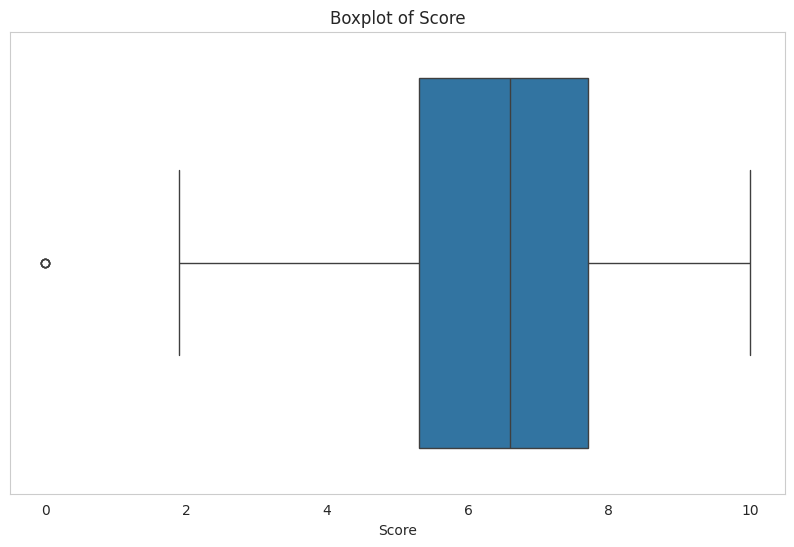

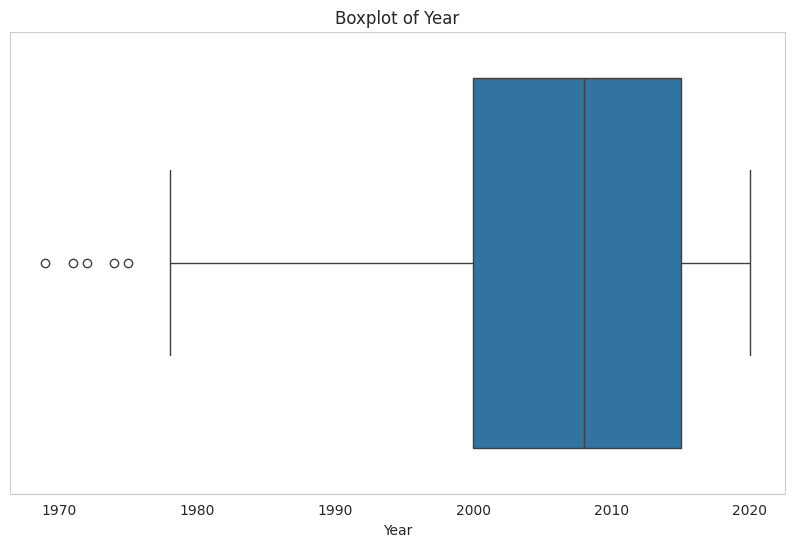

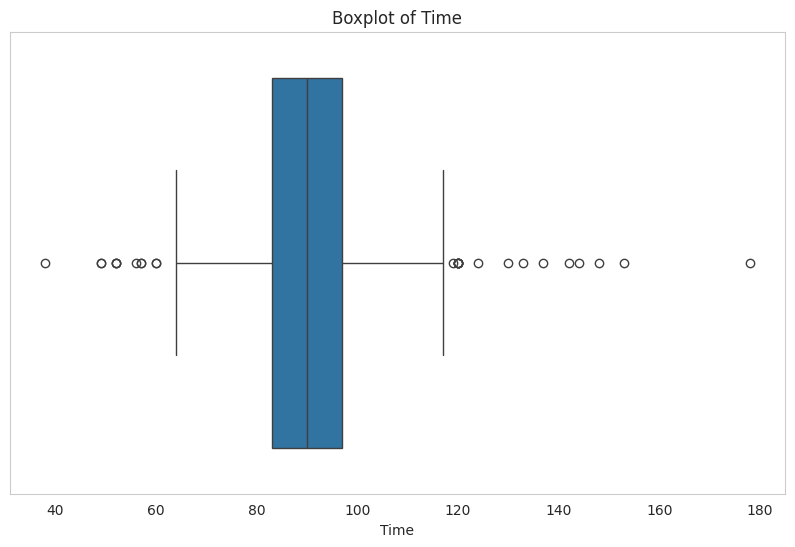

Analysis of potential outliers in Score:
Lower bound: 1.6999999999999993
Upper bound: 11.3
Number of outliers: 4
Outliers might be due to data issues or measurement errors.
[0.0, 0.0, 0.0, 0.0]


Analysis of potential outliers in Year:
Lower bound: 1977.5
Upper bound: 2037.5
Number of outliers: 5
Outliers seem to be genuine, as they significantly deviate from the data distribution.
[1975, 1974, 1972, 1971, 1969]


Analysis of potential outliers in Time:
Lower bound: 62.0
Upper bound: 118.0
Number of outliers: 27
Outliers seem to be genuine, as they significantly deviate from the data distribution.
[130.0, 60.0, 120.0, 148.0, 120.0, 120.0, 142.0, 49.0, 57.0, 52.0, 52.0, 119.0, 178.0, 120.0, 124.0, 52.0, 49.0, 38.0, 60.0, 133.0, 137.0, 120.0, 56.0, 144.0, 57.0, 120.0, 153.0]


according to investigations, we remove score outliers:
[ 1.9  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.4  3.5  3.6  3.7  3.8
  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2
  5.3  5.4  5.5  

In [18]:
# Feel free to add any desired methods to the class below this is a suggestion you can change it anyway you like!

class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        """
        Identify and visualize potential outliers for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots for identifying outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Create a boxplot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=self.df[col])
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.show()

    def investigate_outliers(self, numerical_cols):

        for col in numerical_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
            insights = self.analyze_outliers(outliers, col, lower_bound, upper_bound)
            print(f'Analysis of potential outliers in {col}:')
            print(f'Lower bound: {lower_bound}')
            print(f'Upper bound: {upper_bound}')
            print(f'Number of outliers: {outliers.shape[0]}')
            print(insights)
            print(outliers[col].tolist())
            print('\n')

    def analyze_outliers(self, outliers, col, lower_bound, upper_bound):
        """
        Analyze potential outliers to determine if they are genuine or result from data issues.

        Args:
            outliers (DataFrame): DataFrame containing potential outliers.

        Returns:
            str: Analysis of outliers with insights or recommendations.
        """
        # Perform analysis based on domain knowledge or statistical techniques
        # Here, we're providing a simple example of how to analyze outliers
        if outliers[[col]].empty:
            return "No outliers detected."

        updated_df = self.df[(self.df[col] >= lower_bound) & (self.df[col] <= upper_bound)];
        col_mean = updated_df[col].mean()
        col_median = updated_df[col].median()
        col_std = updated_df[col].std()

        # Get statistical properties of the outliers
        outliers_mean = outliers[col].mean()
        outliers_median = outliers[col].median()
        outliers_std = outliers[col].std()

        if outliers_mean > 3 * col_mean or col_mean < 3 * outliers_mean:
            return "Outliers seem to be genuine, as they significantly deviate from the data distribution."
        else:
            return "Outliers might be due to data issues or measurement errors."



# Assuming you have a pandas DataFrame named 'df'
outlier_detection = OutlierDetection(df)
numerical_cols = ['Score', 'Year', 'Time']
outlier_detection.identify_outliers(numerical_cols)
outlier_detection.investigate_outliers(numerical_cols)

print("according to investigations, we remove score outliers:")
df = df[(df['Score'] >= 0.1)]
scores = df['Score'].unique()
scores.sort()
print(scores)


###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [19]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture',
}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre']).astype('category')


<ipython-input-19-de7b09affc8a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre']).astype('category')


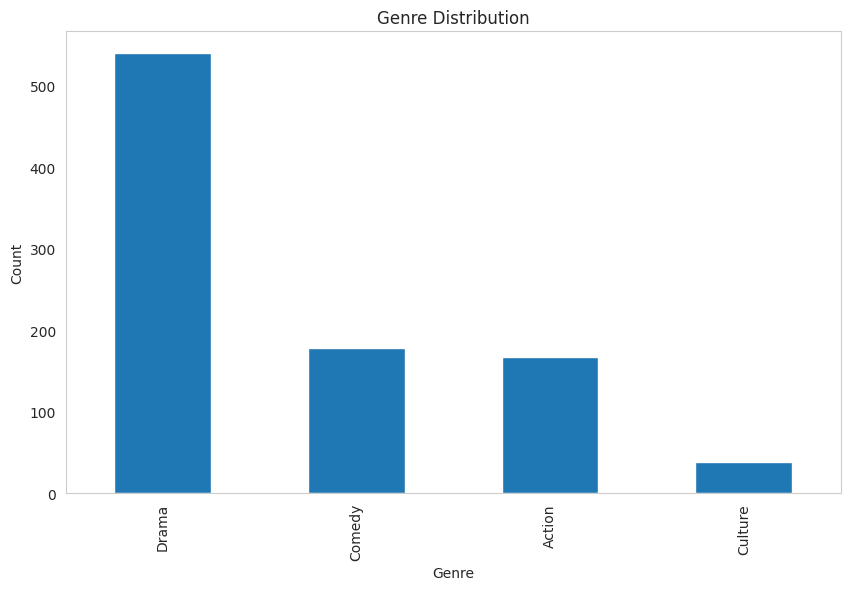

In [20]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



Class Imbalance:
New_Genre
Drama      438
Comedy     141
Action     130
Culture     29
Name: count, dtype: int64


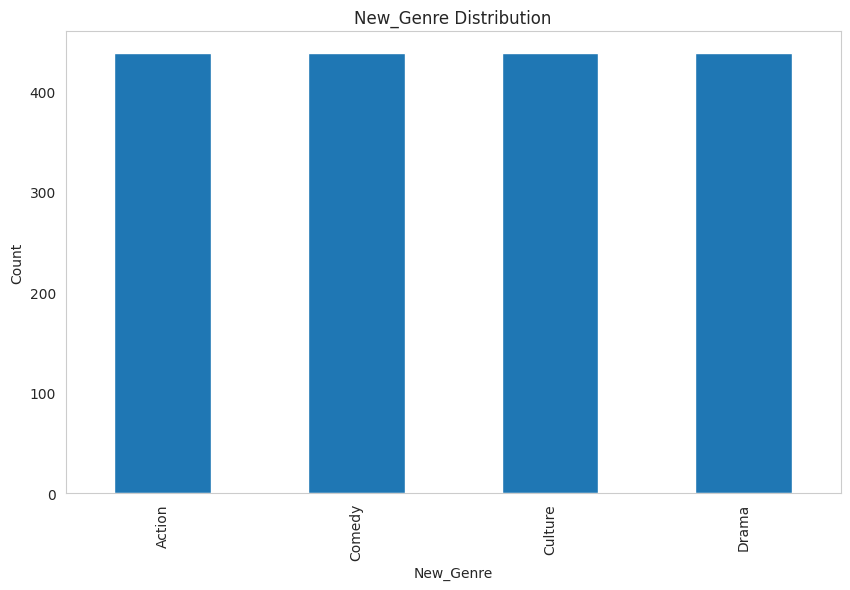

In [21]:
# Based on above description, you can modify the given class.
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE

class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split the dataset into training and testing sets.

        Args:
            test_size (float): The proportion of the dataset to include in the test split (default: 0.2).
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_train, X_test, y_train, y_test)
                X_train (pandas.DataFrame): Training features.
                X_test (pandas.DataFrame): Testing features.
                y_train (pandas.Series): Training target.
                y_test (pandas.Series): Testing target.

        TODO:
        1. Separate the target variable from the features.
        2. Split the dataset into training and testing sets using the provided test_size and random_state.
        3. Return the training and testing features and targets.
        """
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def resample_data(self, X_train, y_train, random_state=42):
        """
        Apply resampling techniques to balance the training dataset.

        Args:
            X_train (pandas.DataFrame): Training features.
            y_train (pandas.Series): Training target.
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_resampled, y_resampled)
                X_resampled (pandas.DataFrame): Resampled training features.
                y_resampled (pandas.Series): Resampled training target.

        TODO:
        1. Identify the class imbalance in the training data.
        2. Apply appropriate resampling techniques (e.g., RandomOverSampler, SMOTE) to balance the classes.
        3. Return the resampled training features and target.
        """
        class_counts = y_train.value_counts()
        print("Class Imbalance:")
        print(class_counts)

        sampler = RandomOverSampler(random_state=random_state)
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        return X_resampled, y_resampled

target_col = 'New_Genre'
data_resampling = DataResampling(df, target_col)

X_train, X_test, y_train, y_test = data_resampling.split_data()
X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train)

genre_counts = y_resampled.value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('New_Genre Distribution')
plt.xlabel('New_Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [22]:
# Feel free to change or modify this function, this is a suggestion.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols

    def label_encode(self, drop_first=False):
        """
        Apply label encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables encoded.

        TODO:
        1. Instantiate a LabelEncoder object.
        2. Iterate through each categorical column.
        3. Fit and transform the categorical column using the LabelEncoder.
        4. Replace the original categorical column with the encoded values.
        5. Return the encoded DataFrame.
        """
        for col in self.categorical_cols:
            label_encoder = LabelEncoder()
            self.df[col] = label_encoder.fit_transform(self.df[col])
        return self.df

    def one_hot_encode(self, drop_first=False):
        """
        Apply one-hot encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables one-hot encoded.

        TODO:
        1. Instantiate a OneHotEncoder object with the appropriate settings (drop_first=drop_first, handle_unknown='ignore').
        2. Iterate through each categorical column.
        3. Fit and transform the categorical column using the OneHotEncoder.
        4. Concatenate the one-hot encoded columns with the original DataFrame.
        5. Drop the original categorical columns.
        6. Return the one-hot encoded DataFrame.
        """
        # Instantiate OneHotEncoder with appropriate settings
        one_hot_encoder = OneHotEncoder(drop='first' if drop_first else None, handle_unknown='ignore')

        # Fit and transform categorical columns using OneHotEncoder
        encoded_cols = one_hot_encoder.fit_transform(self.df[self.categorical_cols])

        # Create DataFrame from encoded columns
        encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=one_hot_encoder.get_feature_names_out(self.categorical_cols))

        # Concatenate one-hot encoded columns with original DataFrame
        self.df = pd.concat([self.df, encoded_df], axis=1)

        # Drop original categorical columns
        self.df.drop(columns=self.categorical_cols, inplace=True)
        return self.df


categorical_cols = ['Genre', 'New_Genre']
categorical_encoder = CategoricalEncoder(df, categorical_cols)

df_label_encoded = categorical_encoder.label_encode()
df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)
df.head()

<ipython-input-22-33a7b7931c88>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = label_encoder.fit_transform(self.df[col])
<ipython-input-22-33a7b7931c88>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = label_encoder.fit_transform(self.df[col])


,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed_English,Preprocessed_Persian,New_Genre
Link,,,,,,,,,,,,
https://www.imvbox.com/watch-persian-movie-iranian-movies/local-anaesthetic-bi-hessie-mozeie,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,6,73.0,Jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...,3
https://www.imvbox.com/watch-persian-movie-iranian-movies/disturbance-ashoftegi,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,5,78.0,murder rich twin brother Barbod assume identit...,آشفته‌گی رئالیستی اجتماعی فیلم عشق جنایت,0
https://www.imvbox.com/watch-persian-movie-iranian-movies/highlight-haylayt,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,6,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدم‌هایی تقابل قرار مراقبت مصدوم...,3
https://www.imvbox.com/watch-persian-movie-iranian-movies/gilda-gilda,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,6,79.0,Gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...,3
https://www.imvbox.com/watch-persian-movie-iranian-movies/atmosphere-station-istgha-e-atmosfer,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,6,85.0,Vahid Marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...,3


# Fine-tuning

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long).clone().detach()
        return item

    def __len__(self):
        return len(self.labels)

## Persian

In [35]:
# load pre-trained ParsBERT model and its tokenizer

tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
model = AutoModelForSequenceClassification.from_pretrained('HooshvareLab/bert-base-parsbert-uncased', num_labels=len(df[target_col].unique()))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preprocessed

In [36]:
labels = ['Drama', 'Action', 'Culture', 'Comedy']
label_mapping = {label: idx for idx, label in enumerate(labels)}

y_train_encoded = [label_mapping[label] for label in y_resampled]
y_test_encoded = [label_mapping[label] for label in y_test]

train_encodings = tokenizer(X_resampled['Preprocessed_Persian'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(X_test['Preprocessed_Persian'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

Step,Training Loss
500,0.909100
1000,0.311300
1500,0.048700


Metrics: {'eval_loss': 0.00022169805015437305, 'eval_runtime': 32.8444, 'eval_samples_per_second': 53.342, 'eval_steps_per_second': 6.668, 'epoch': 4.0}
[[79  7  0 16]
 [21 11  0  5]
 [ 8  0  0  1]
 [17  5  0 15]]
Accuracy: 0.5675675675675675
F1-score: 0.5381743858395841


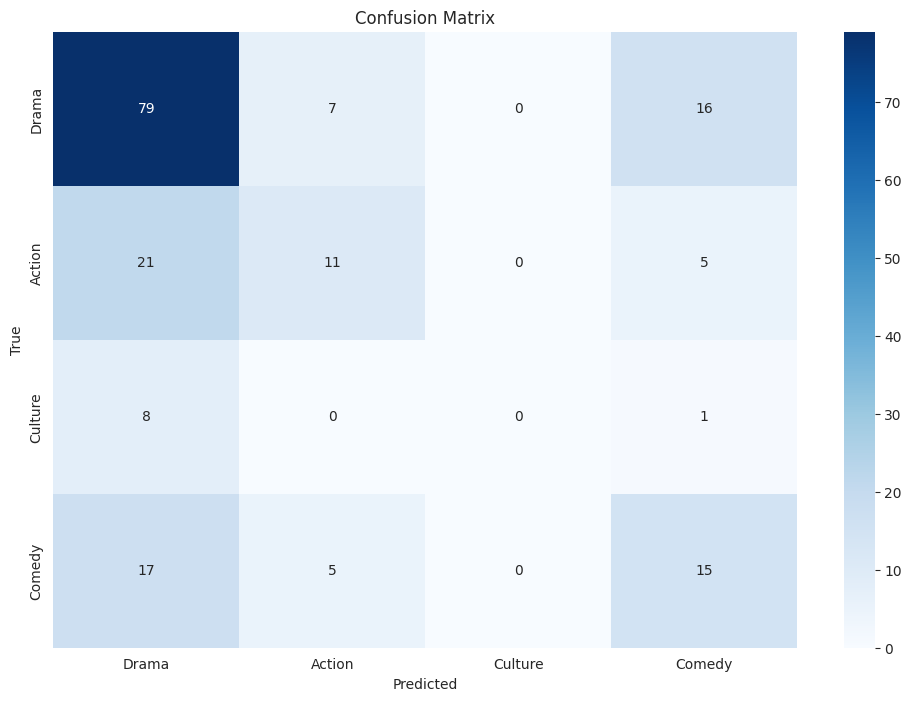

In [37]:
# # Train the model using huggingface trainer

num_epochs = 4
batch_size = 4
training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',
    num_train_epochs=4,
    per_device_train_batch_size=4,
    weight_decay=0.01,
    warmup_steps=500
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()

# Ensure y_test_encoded is used instead of y_test to match encoding
y_true = y_test_encoded
metrics = trainer.evaluate(train_dataset)
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Metrics: {metrics}")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping, yticklabels=label_mapping)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Not Preprocessed


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.874200
1000,0.313600
1500,0.050100
2000,0.000500


Metrics: {'eval_loss': 0.00010579232184682041, 'eval_runtime': 47.101, 'eval_samples_per_second': 37.197, 'eval_steps_per_second': 4.65, 'epoch': 5.0}
[[89  7  1  5]
 [28  8  0  1]
 [ 8  0  0  1]
 [29  0  0  8]]
Accuracy: 0.5675675675675675
F1-score: 0.5064384095634096


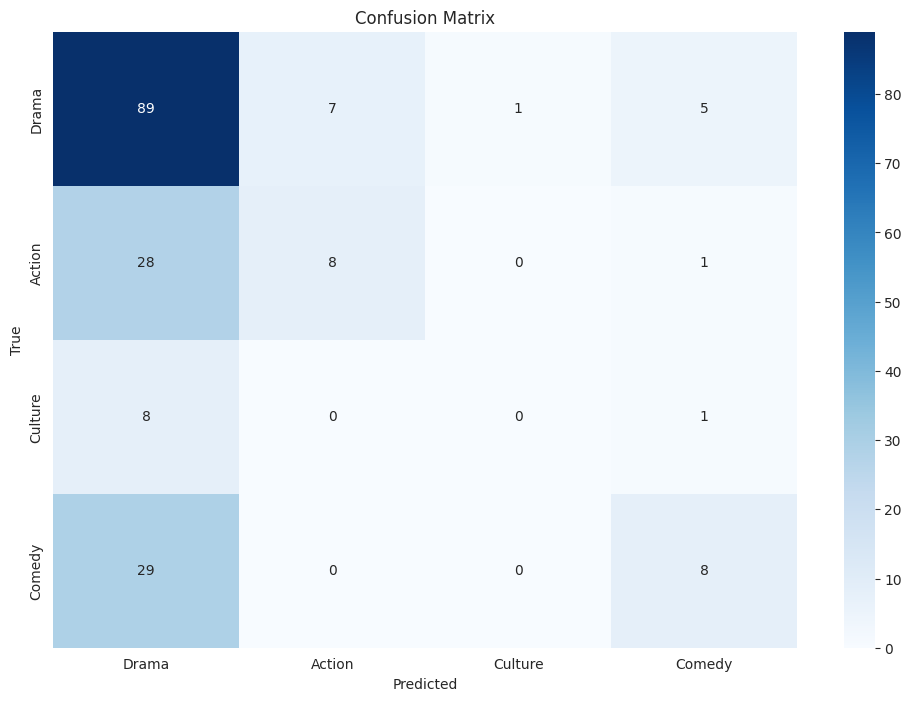

In [38]:
# Repeat all the previous steps for the raw persian data
# Don't forget to load the model again

tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
model = AutoModelForSequenceClassification.from_pretrained('HooshvareLab/bert-base-parsbert-uncased', num_labels=len(df[target_col].unique()))

train_encodings = tokenizer(X_resampled['Content_1'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(X_test['Content_1'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

num_epochs = 5
batch_size = 4
training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    weight_decay=0.01,
    warmup_steps=500
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()

# Ensure y_test_encoded is used instead of y_test to match encoding
y_true = y_test_encoded
metrics = trainer.evaluate(train_dataset)
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Metrics: {metrics}")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping, yticklabels=label_mapping)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## English


In [39]:
# load  pre-trained BERT model and its tokeniz
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df[target_col].unique()))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preprocessed

Step,Training Loss
500,1.008600
1000,0.383000
1500,0.103700
2000,0.024700
2500,0.000300


Metrics: {'eval_loss': 0.00018201337661594152, 'eval_runtime': 33.2858, 'eval_samples_per_second': 52.635, 'eval_steps_per_second': 6.579, 'epoch': 6.0}
[[80 12  0 10]
 [24 12  0  1]
 [ 6  0  2  1]
 [18  2  0 17]]
Accuracy: 0.6
F1-score: 0.5804599630686588


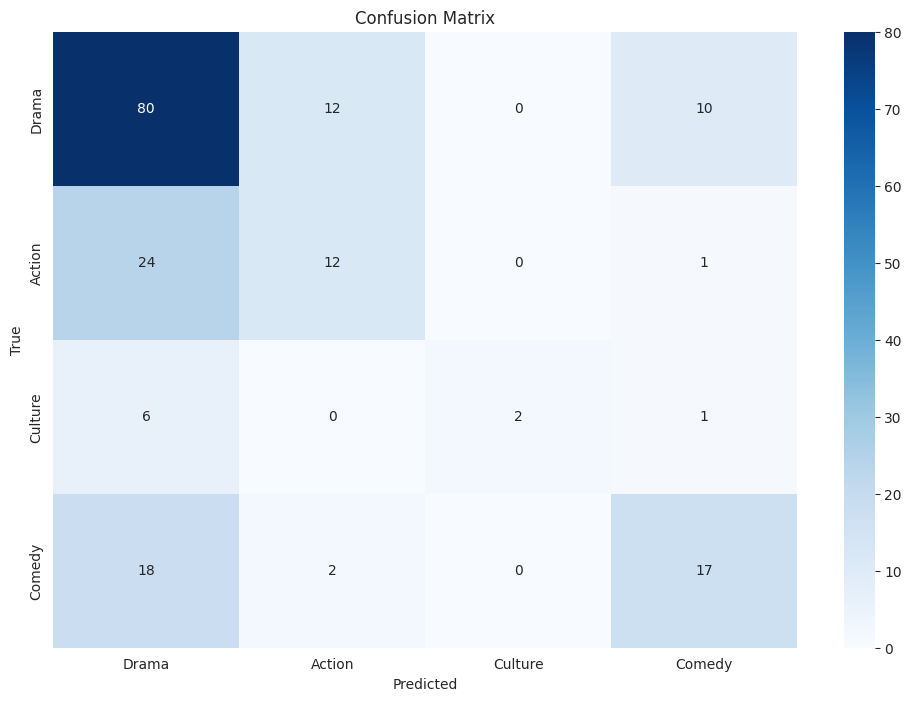

In [40]:
# Repeat all the needed steps for the preprocessed english data
train_encodings = tokenizer(X_resampled['Preprocessed_English'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(X_test['Preprocessed_English'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

num_epochs = 6
batch_size = 4
training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    weight_decay=0.01,
    warmup_steps=500
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()

# Ensure y_test_encoded is used instead of y_test to match encoding
y_true = y_test_encoded
metrics = trainer.evaluate(train_dataset)
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Metrics: {metrics}")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping, yticklabels=label_mapping)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Not Preprocessed


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.802100
1000,0.093700


Metrics: {'eval_loss': 0.0036599270533770323, 'eval_runtime': 47.0161, 'eval_samples_per_second': 37.264, 'eval_steps_per_second': 4.658, 'epoch': 5.0}
[[86  8  0  8]
 [24 13  0  0]
 [ 6  1  2  0]
 [22  1  0 14]]
Accuracy: 0.6216216216216216
F1-score: 0.5944074737295076


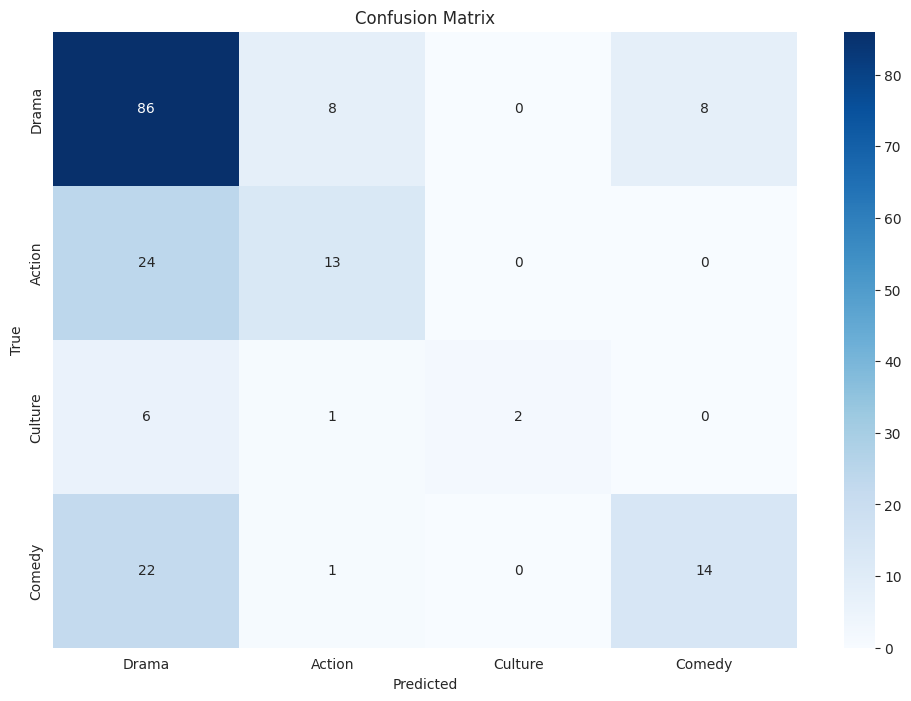

In [41]:
# Repeat all the previous steps for the raw english data
# Don't forget to load the model again
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df[target_col].unique()))

train_encodings = tokenizer(X_resampled['Content_2'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(X_test['Content_2'].to_list(), padding=True, truncation=True, max_length=512, return_tensors='pt')
train_dataset = CustomDataset(train_encodings, y_train_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

num_epochs = 5
batch_size = 8
training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    weight_decay=0.01,
    warmup_steps=500
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

trainer.train()

# Ensure y_test_encoded is used instead of y_test to match encoding
y_true = y_test_encoded
metrics = trainer.evaluate(train_dataset)
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Metrics: {metrics}")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping, yticklabels=label_mapping)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Results Analysis

Analyze the results of the Fine-tuning section.
